# Analysis of Employee performance from 2019 to 2020
6 Metrics:

1. Aht (seconds/call)
2. Unplanned out (%)
3. Mean attrition (%)
4. Mean conformance (%)
5. Mean monthly system outage (hours)
6. Mean shrinkage (%)

# Load Data

In [87]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

df = pd.read_csv('wfh3.csv')
df.rename(columns={'ACTIVITY DATE': 'date', 'BUSINESS UNIT': 'bu'}, inplace=True)
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.month_name()
df['year'] = df['date'].dt.year
df['aht'] = df['TOTAL TIME - AHT (sec)'] / df['VOLUME - HANDLED']

df.head()

,date,bu,VOLUME - HANDLED,TOTAL TIME - AHT (sec),AHT CALC,Sum of PRODUCTIVE TIME - ACTUAL (hrs),Sum of PRODUCTIVE TIME - SCHEDULED (hrs),Conformance CALC,Attrition,EOM Headcount,Attrition % CALC,System Outage (hrs),Unplanned out,Shrinkage,Regular Scheduled Time (no OT),Unplanned out % CALC,Shrinkage % CALC,month,year,aht
0,2019-01-01,Client Transactions,290,0,0,0.000000,0.0,#DIV/0!,0,0,NaN,0.0,0.0,0.00,0.00,#DIV/0!,#DIV/0!,January,2019,0.000000
1,2019-01-01,Participant Transactions,429,0,0,0.000000,0.0,#DIV/0!,0,0,NaN,0.0,0.0,0.00,0.00,#DIV/0!,#DIV/0!,January,2019,0.000000
2,2019-01-01,RAM,1072,1315240,1226.902985,360.443889,507.5,0.710234264,0,0,NaN,0.0,0.0,115.25,656.25,0%,18%,January,2019,1226.902985
3,2019-01-01,RCS PHONES,0,0,#DIV/0!,0.000000,0.0,#DIV/0!,0,0,NaN,0.0,0.0,0.00,0.00,#DIV/0!,#DIV/0!,January,2019,NaN
4,2019-01-01,RIS,3,105,35,0.000000,0.0,#DIV/0!,0,0,NaN,0.0,0.0,0.00,0.00,#DIV/0!,#DIV/0!,January,2019,35.000000


In [88]:
df = df[~df['date'].dt.weekday.isin([5,6])]

# 1. AHT

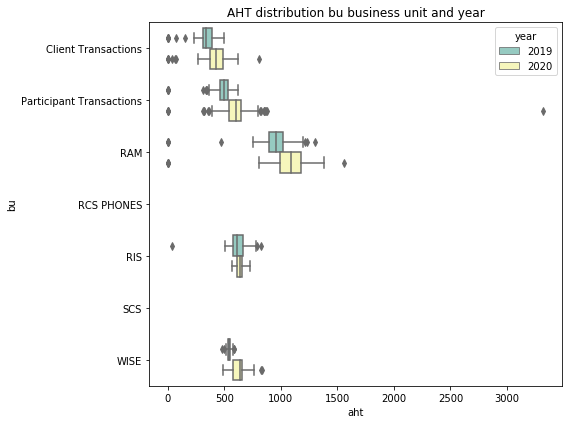

In [90]:
import seaborn as sns

plt.figure(figsize=(8,6))
ax = sns.boxplot(x="aht", y="bu", hue="year",
                 data=df, palette="Set3")
plt.title('AHT distribution bu business unit and year')
plt.tight_layout()

# 2. Unplanned Out (%)

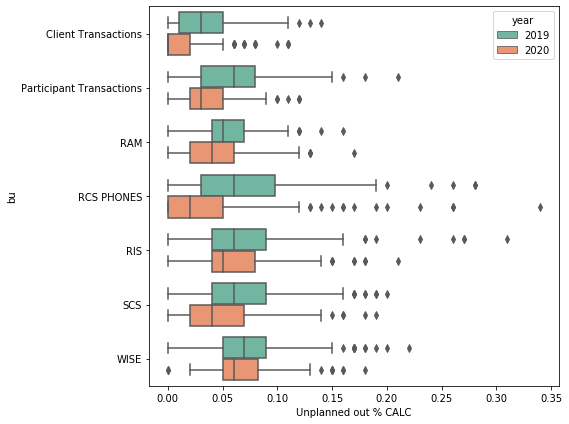

In [91]:
df['Unplanned out % CALC'] = pd.to_numeric(df['Unplanned out % CALC'].str.replace('%', ''), errors='coerce')/100

plt.figure(figsize=(8,6))
ax = sns.boxplot(x='Unplanned out % CALC', y="bu", hue="year",
                 data=df, palette="Set2")
plt.tight_layout()

# 3. Mean attrition (%)

In [92]:
df.columns

Index(['date', 'bu', 'VOLUME - HANDLED', 'TOTAL TIME - AHT (sec)', 'AHT CALC',
       'Sum of PRODUCTIVE TIME - ACTUAL (hrs)',
       'Sum of PRODUCTIVE TIME - SCHEDULED (hrs)', 'Conformance CALC',
       'Attrition', 'EOM Headcount', 'Attrition % CALC', 'System Outage (hrs)',
       'Unplanned out', 'Shrinkage', 'Regular Scheduled Time (no OT)',
       'Unplanned out % CALC', 'Shrinkage % CALC', 'month', 'year', 'aht'],
      dtype='object')

In [93]:
df['Attrition % CALC'].describe()

count    96.000000
mean      0.037939
std       0.030734
min       0.006494
25%       0.017818
50%       0.026743
75%       0.047619
max       0.125000
Name: Attrition % CALC, dtype: float64

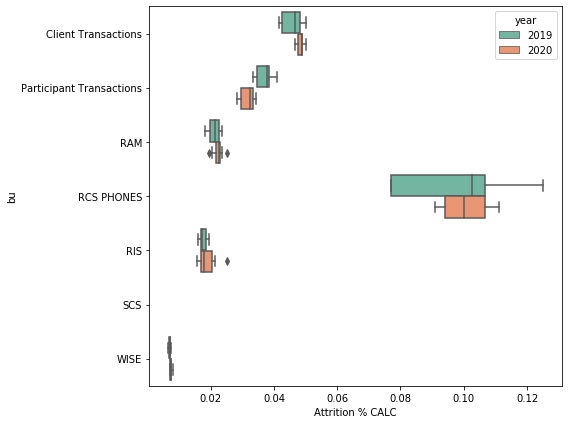

In [94]:
plt.figure(figsize=(8,6))
ax = sns.boxplot(x='Attrition % CALC', y="bu", hue="year",
                 data=df, palette="Set2")
plt.tight_layout()

# 4. Mean conformance (%)

In [95]:
df['Conformance CALC'] = pd.to_numeric(df['Conformance CALC'].str.replace('%', ''), errors='coerce')
df['Conformance CALC'].describe()

count    2393.000000
mean        0.939399
std         0.063872
min         0.000000
25%         0.922599
50%         0.954189
75%         0.972888
max         1.130215
Name: Conformance CALC, dtype: float64

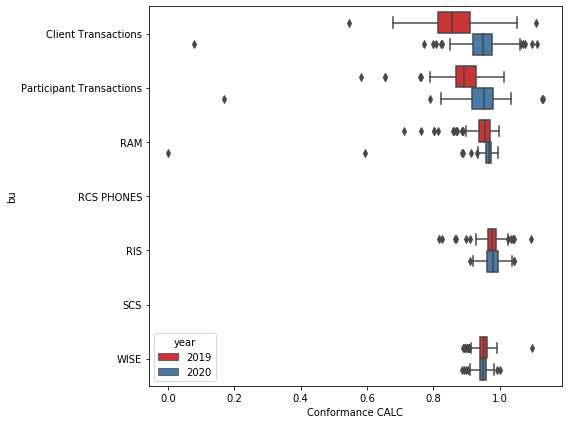

In [96]:
plt.figure(figsize=(8,6))
ax = sns.boxplot(x='Conformance CALC', y="bu", hue="year",
                 data=df, palette="Set1")
plt.tight_layout()

# 5. Mean monthly system outage (hours)

In [97]:
df['System Outage (hrs)'].describe()

count    3521.000000
mean        3.311465
std        14.553505
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max       455.266667
Name: System Outage (hrs), dtype: float64

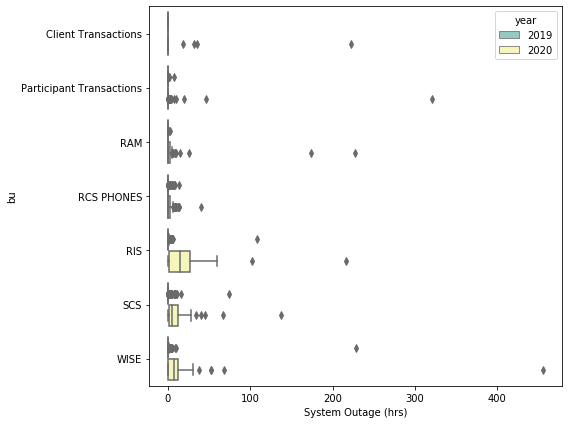

In [98]:
plt.figure(figsize=(8,6))
ax = sns.boxplot(x='System Outage (hrs)', y="bu", hue="year",
                 data=df, palette="Set3")
plt.tight_layout()

# 6. Mean shrinkage (%)

In [99]:
df['Shrinkage % CALC'] = pd.to_numeric(df['Shrinkage % CALC'].str.replace('%', ''), errors='coerce')
df['Shrinkage % CALC'].describe()

count    3371.000000
mean       32.334026
std         9.198082
min         6.000000
25%        26.000000
50%        31.000000
75%        37.000000
max       100.000000
Name: Shrinkage % CALC, dtype: float64

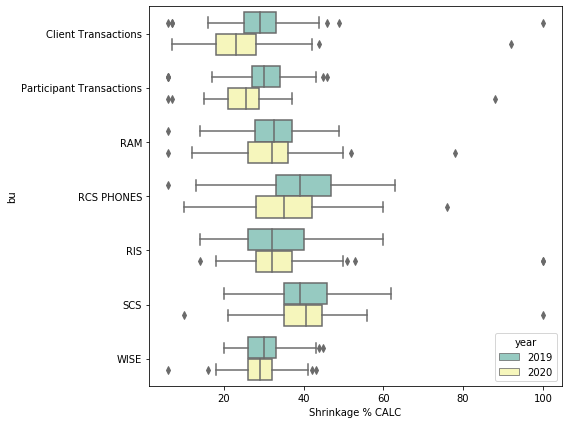

In [100]:
plt.figure(figsize=(8,6))
ax = sns.boxplot(x='Shrinkage % CALC', y="bu", hue="year",
                 data=df, palette="Set3")
plt.tight_layout()

In [76]:
df.to_csv('wfh3_clean.csv', index=False)

In [3]:
# Create plotting function

def plot_bu(df, kpi, group='bu'):
    for i, bu in enumerate(df[group].unique()):
        plt.figure(figsize=(10,4), dpi=100)
        ax = sns.barplot(data=df[df[group]==bu], palette='viridis', x='month', y=kpi, hue='year', errwidth=0)
        plt.title(kpi+' - '+bu, y=1.08)
        
        for p in ax.patches:
            width = p.get_width()
            height = p.get_height()
            x, y = p.get_xy()
            if kpi in ['occupancy', 'online time']:
                vals = ax.get_yticks()
                ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals])
                ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), 
                           ha = 'center', va = 'center', 
                           xytext = (1, 9), 
                           textcoords = 'offset points')
            else:
                ax.annotate(format(p.get_height(), '.1f'), 
                           (p.get_x() + p.get_width() / 2., p.get_height()), 
                           ha = 'center', va = 'center', 
                           xytext = (1, 9), 
                           textcoords = 'offset points')
        plt.ylabel('')
        plt.xlabel('')
        ax.legend(loc='right', bbox_to_anchor=(1.12,0.5))
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        plt.tight_layout()
        plt.show()

# How has the overtime changed Year over Year by business unit and division?

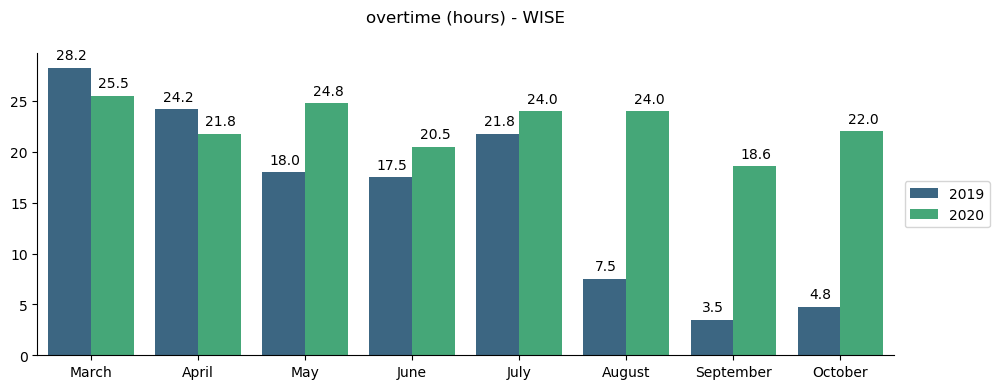

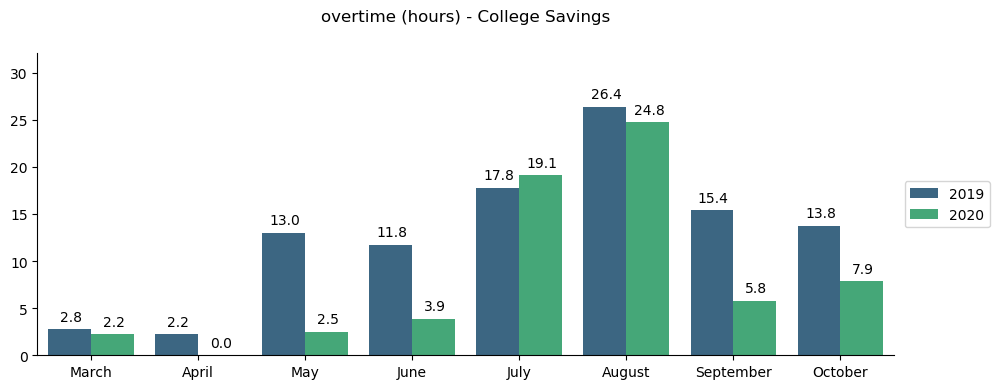

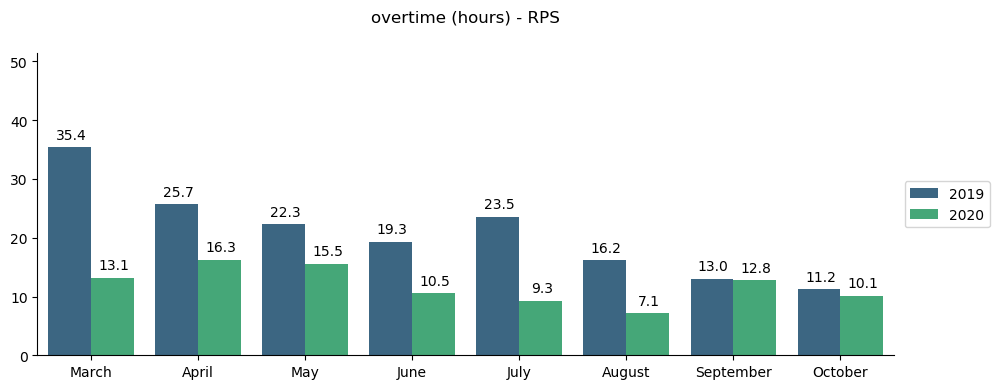

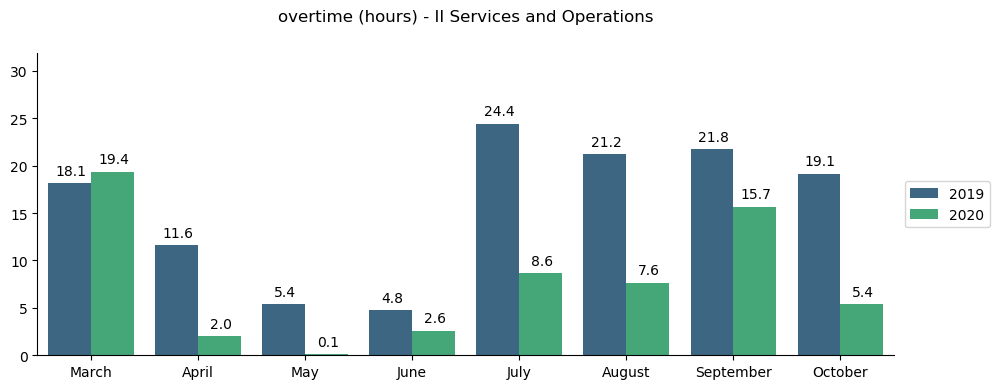

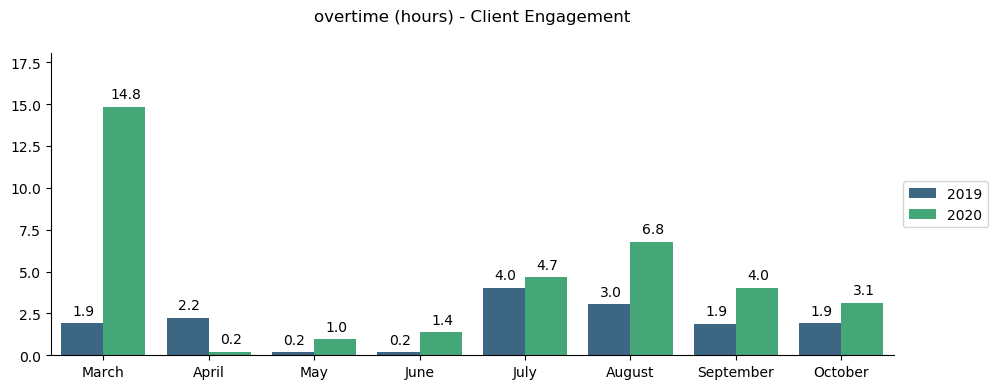

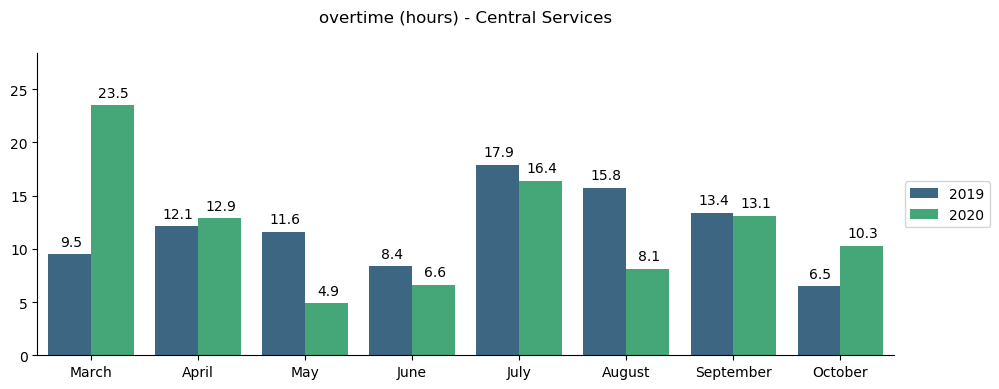

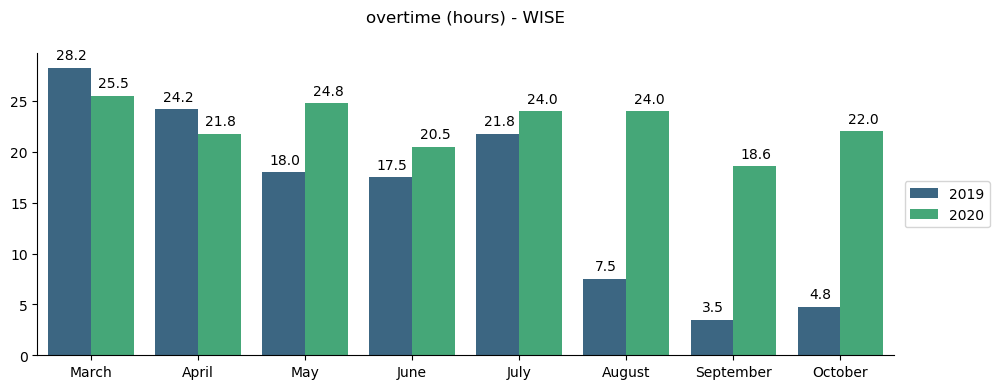

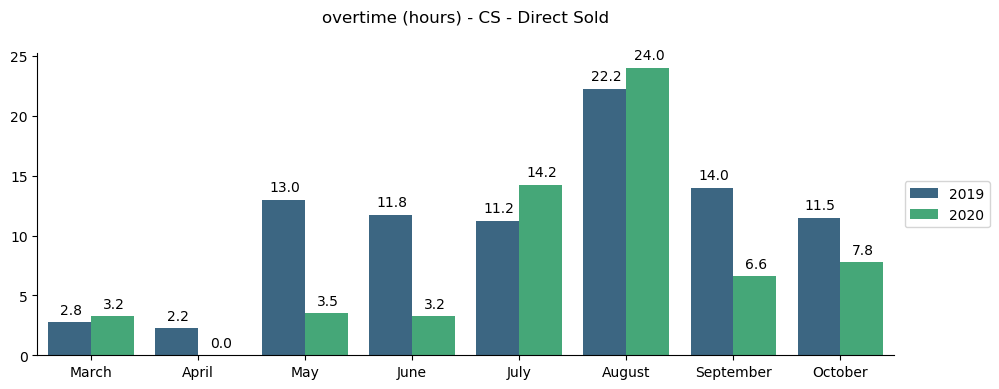

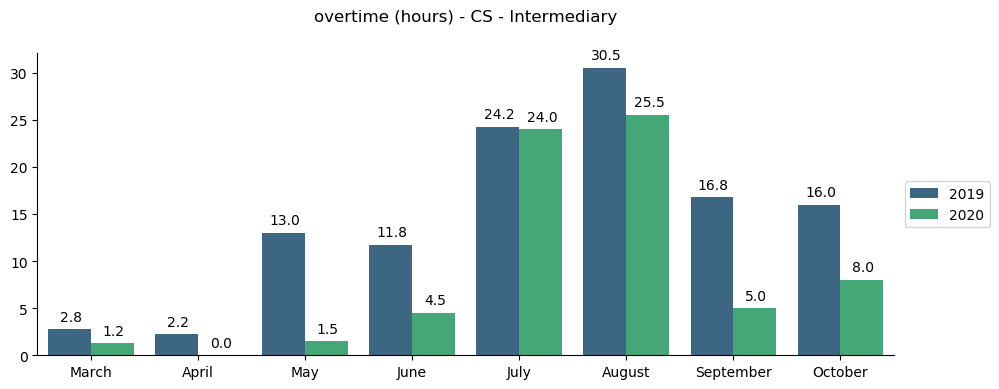

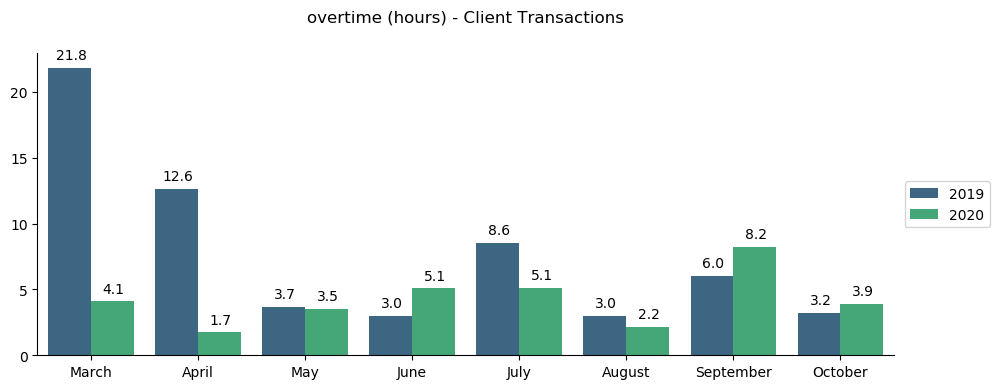

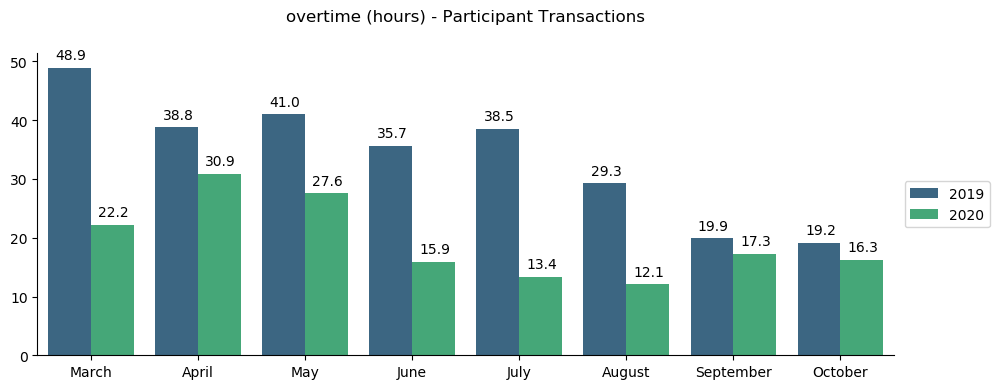

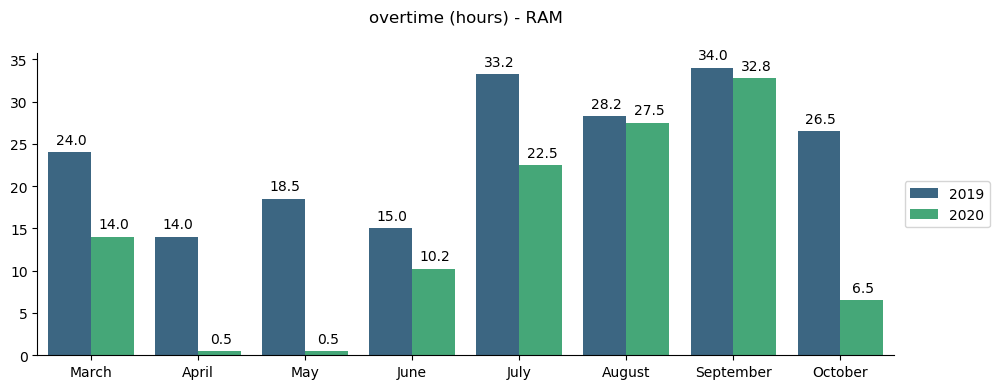

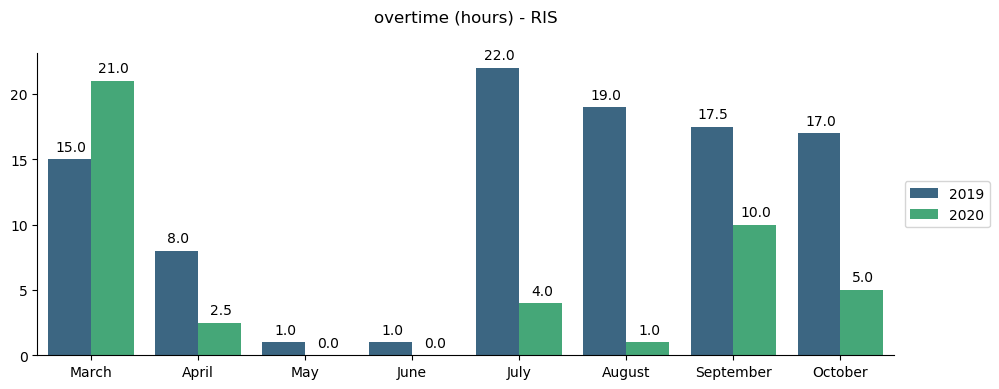

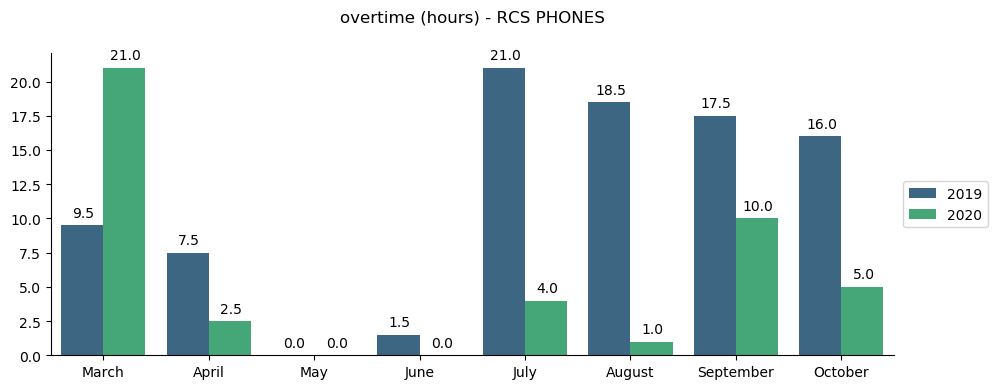

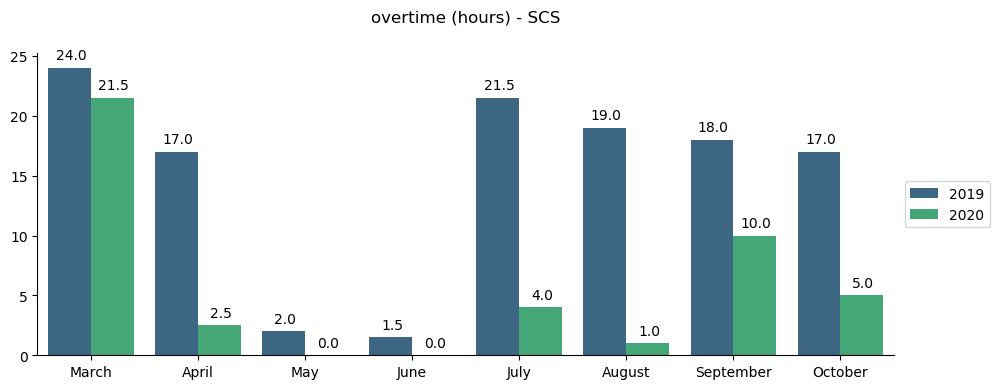

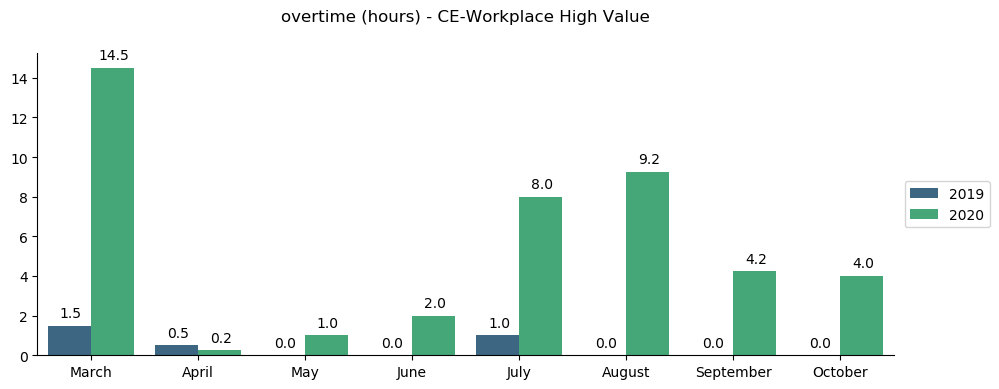

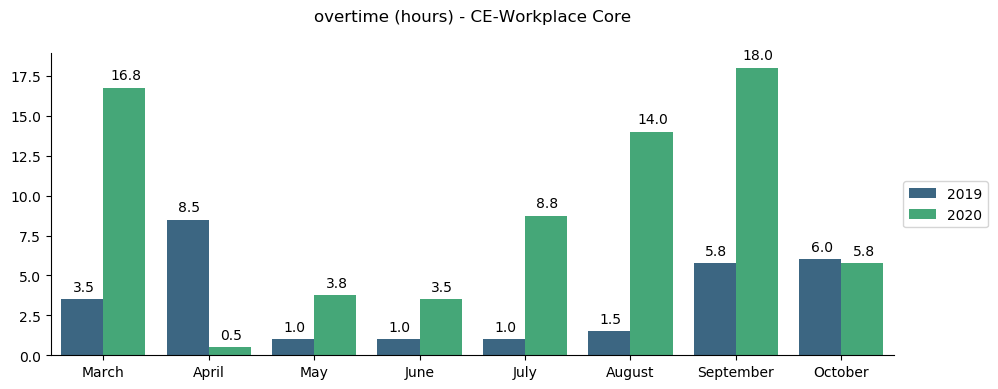

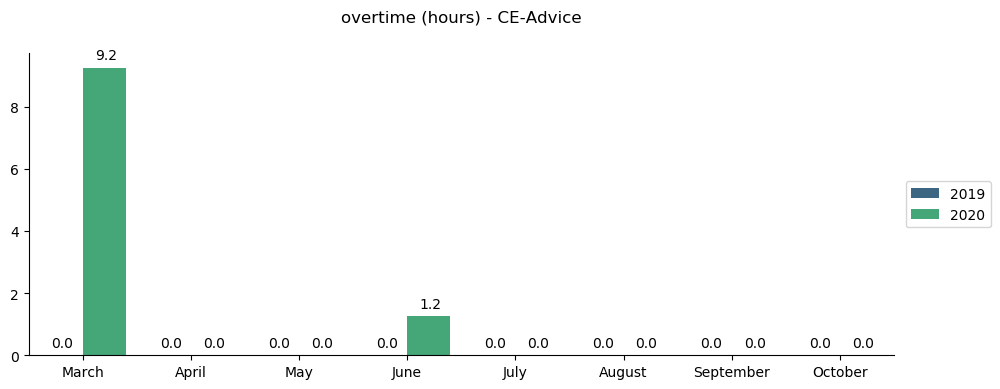

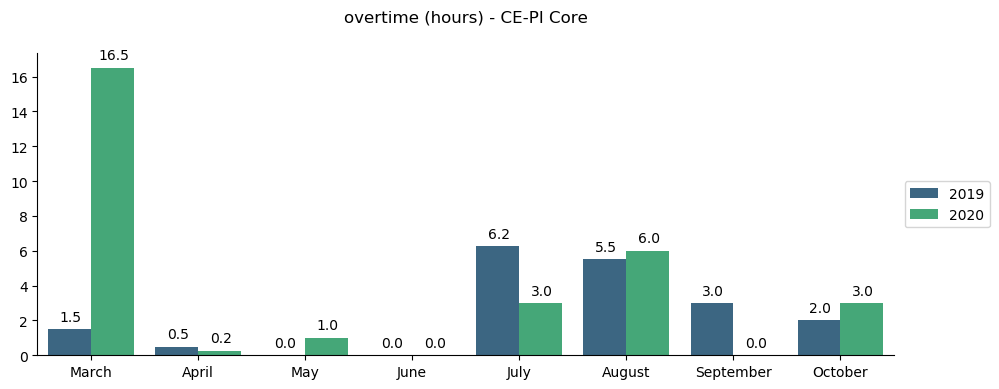

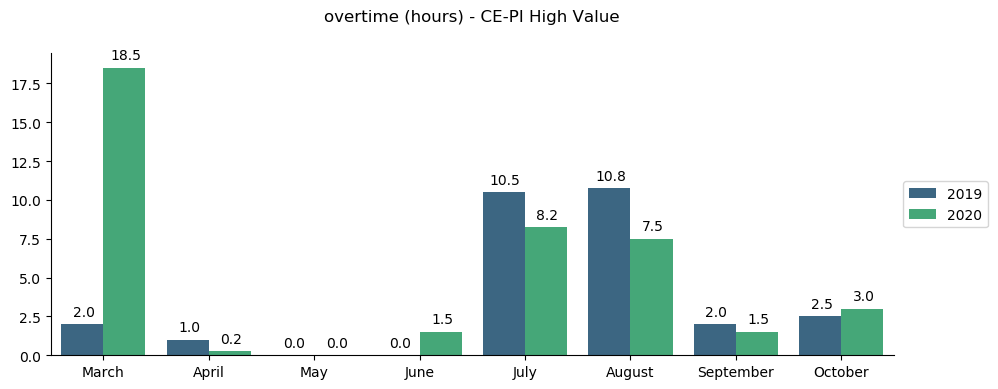

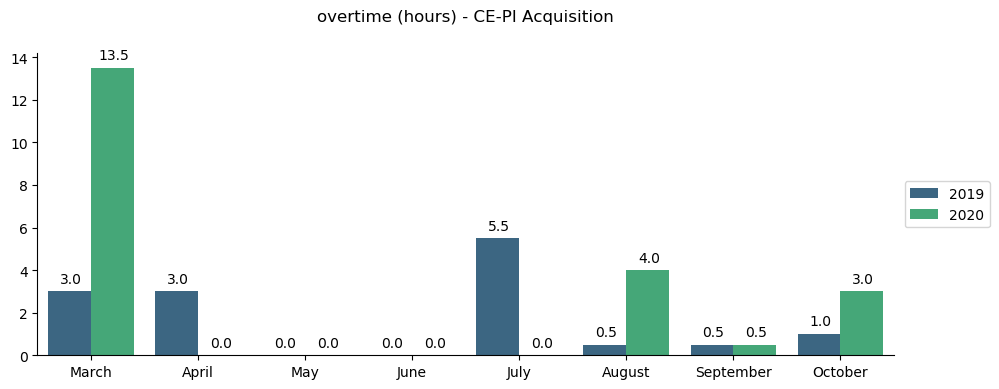

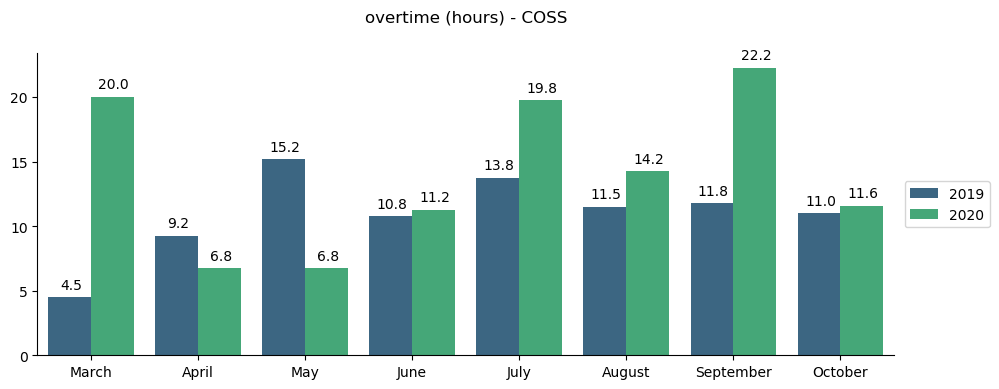

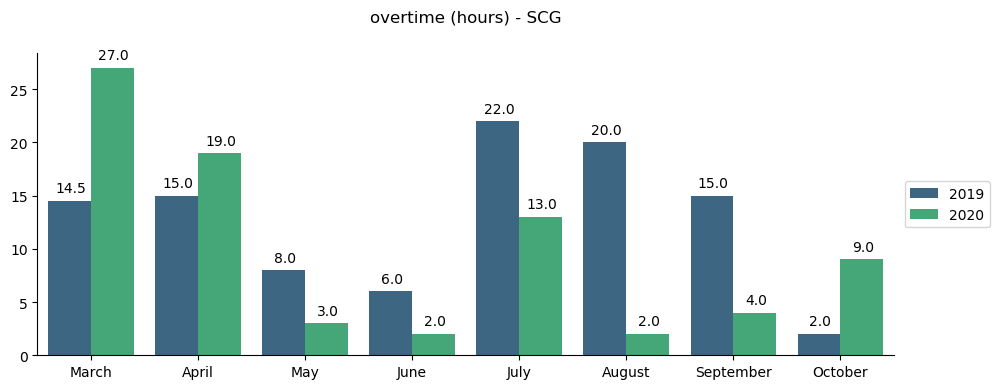

In [4]:
plot_bu(df, 'overtime (hours)', group='div')
plot_bu(df, 'overtime (hours)', group='bu')

# How has occupancy changed by business unit and division?

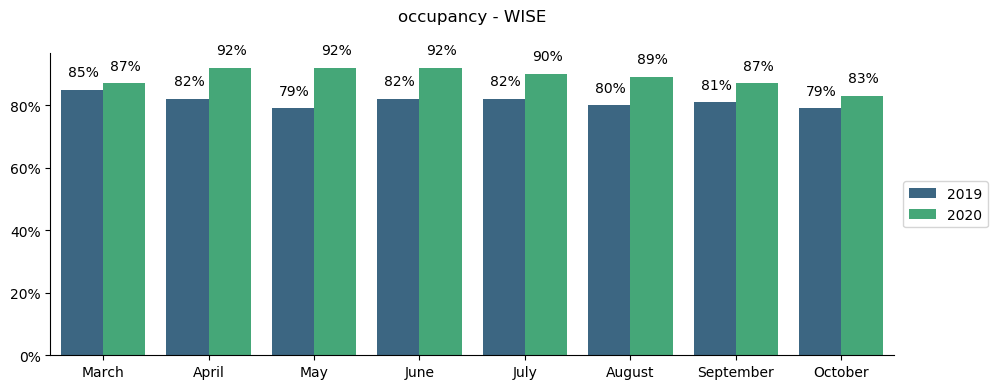

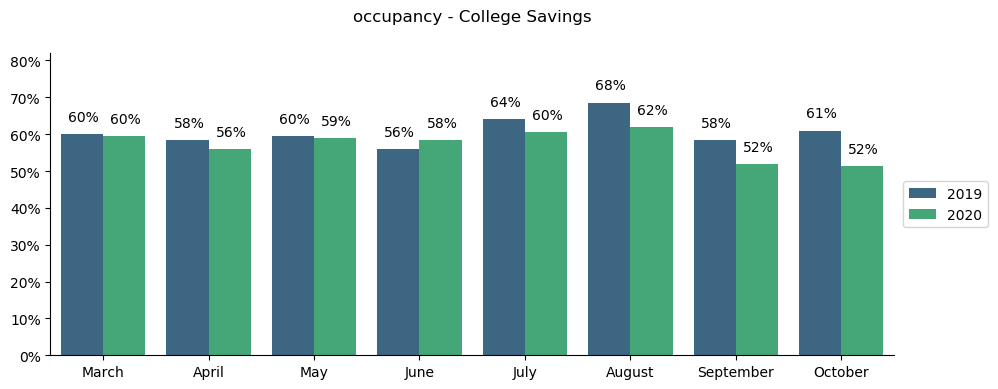

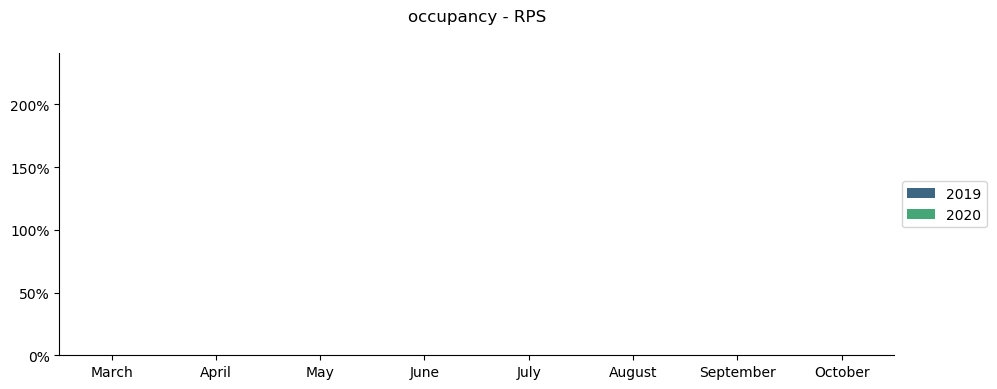

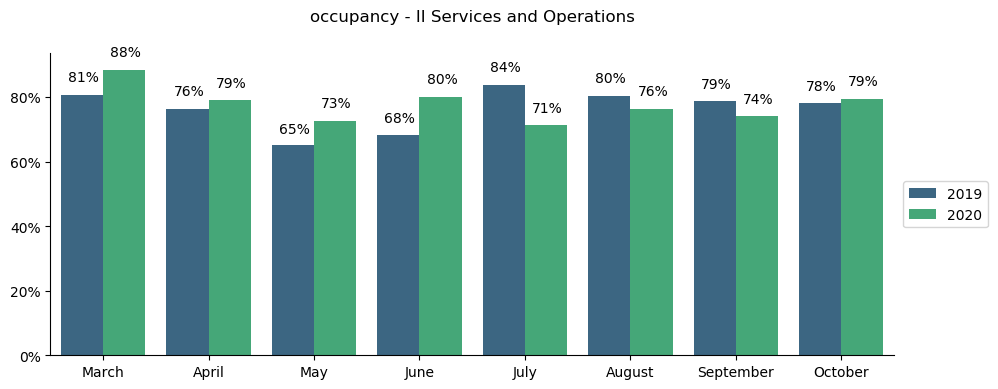

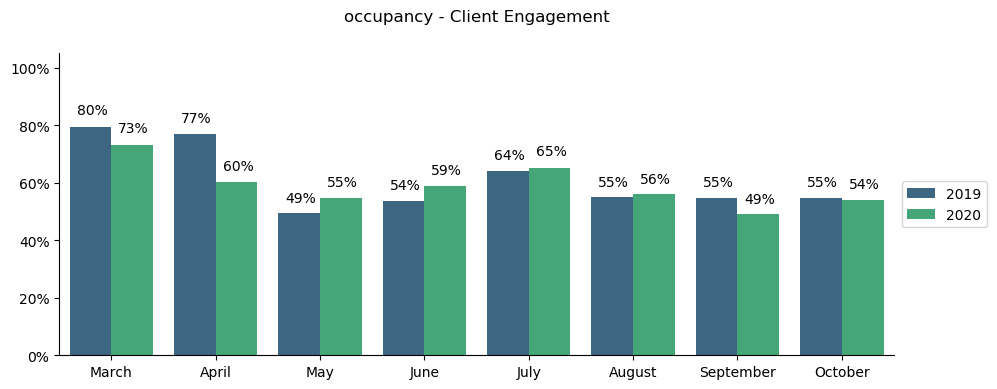

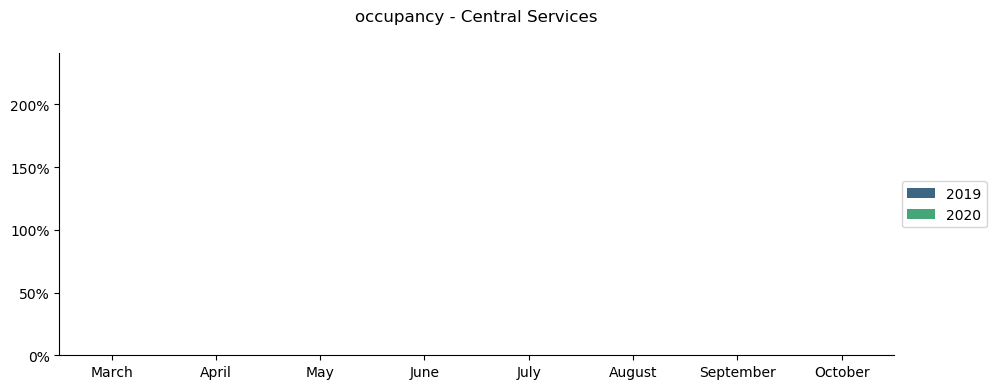

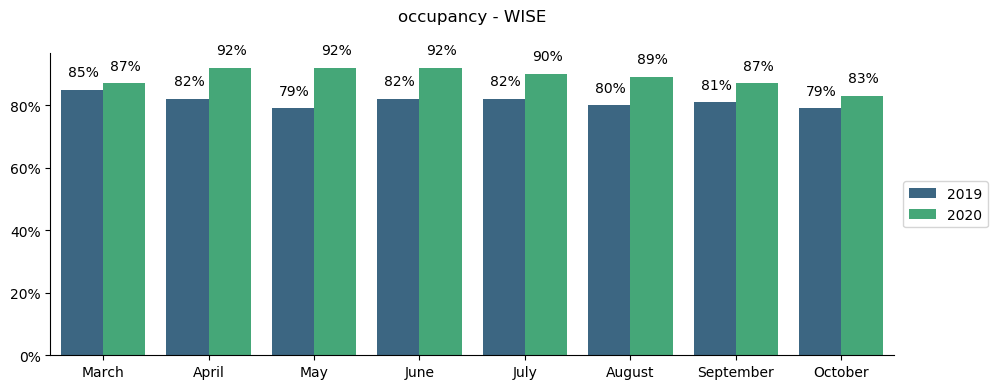

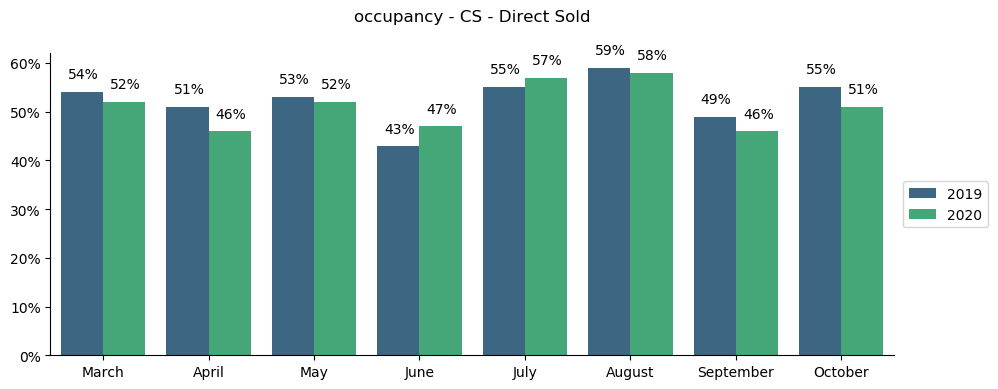

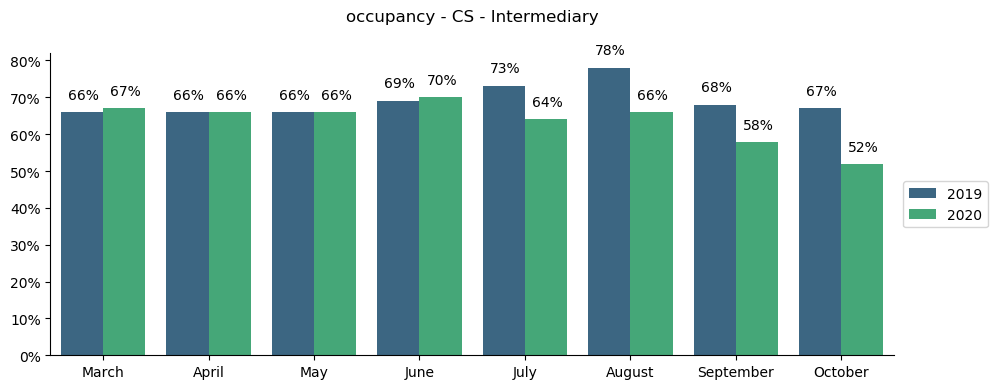

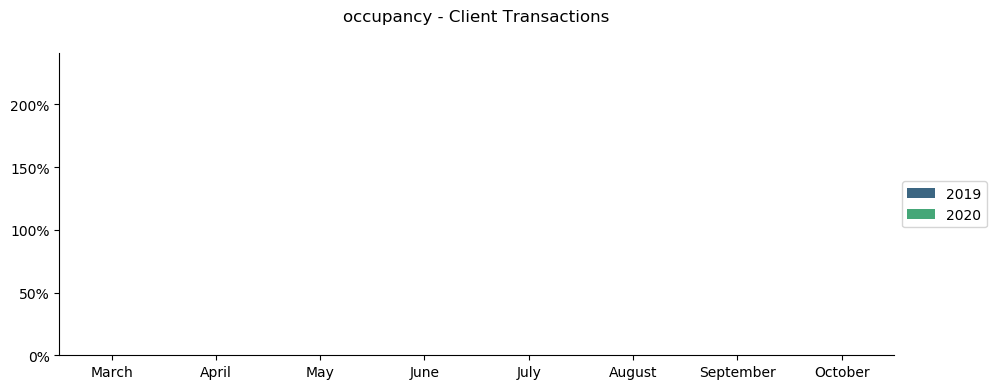

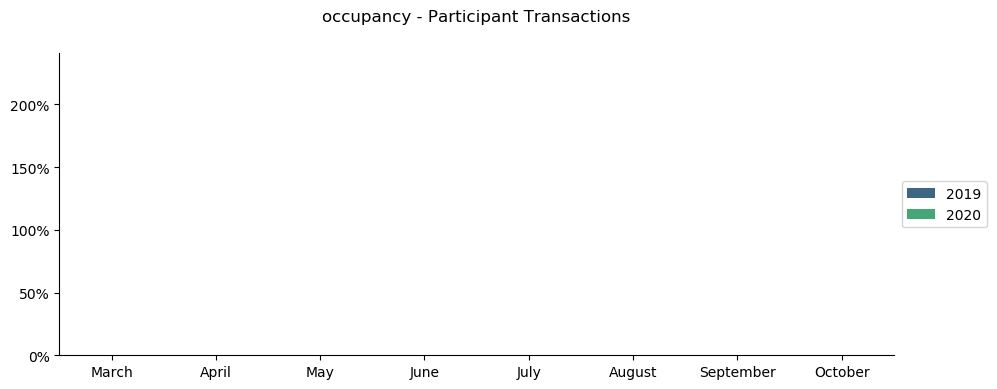

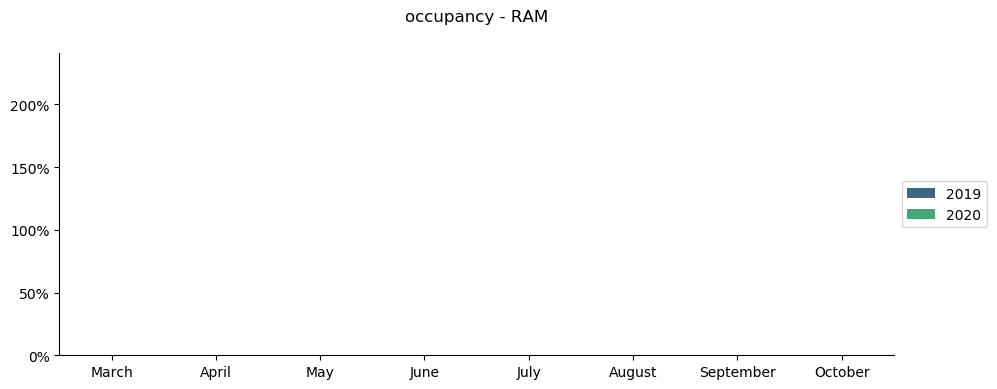

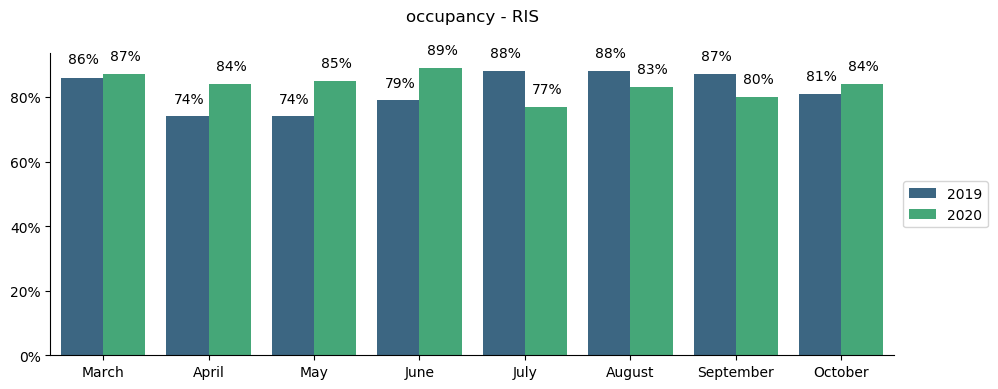

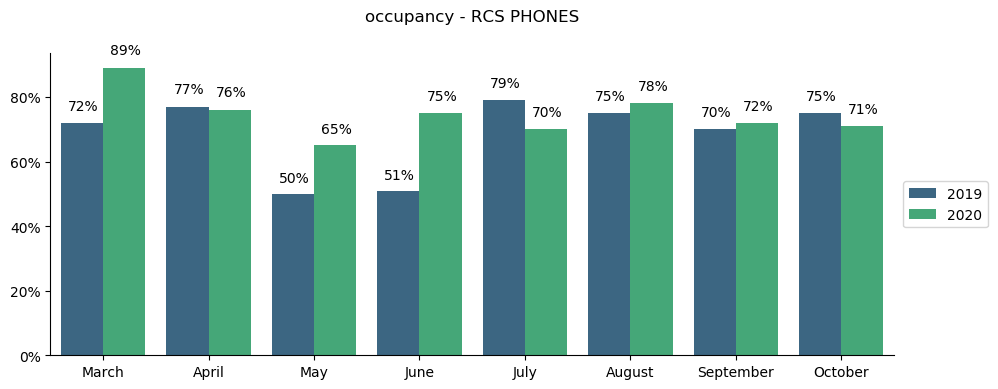

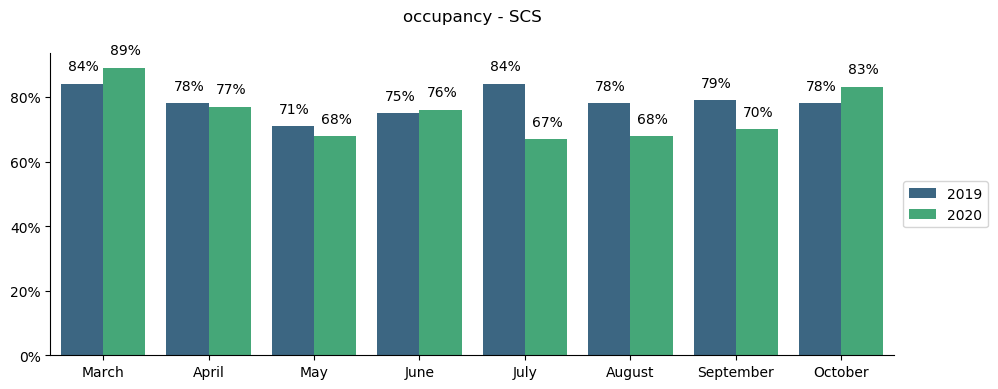

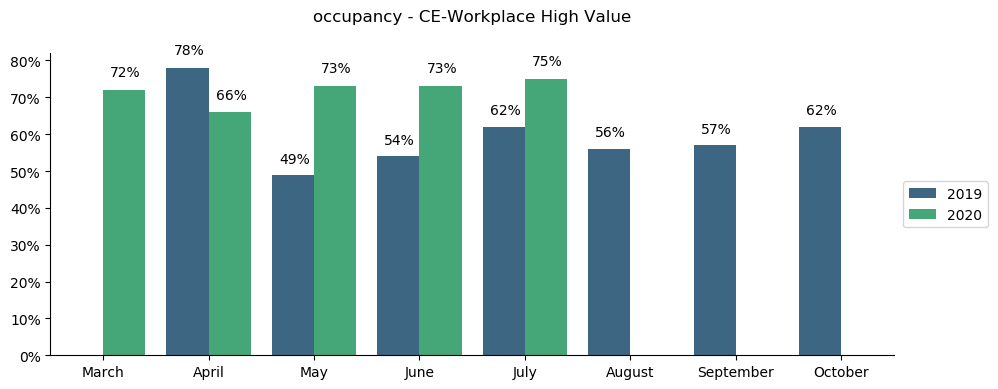

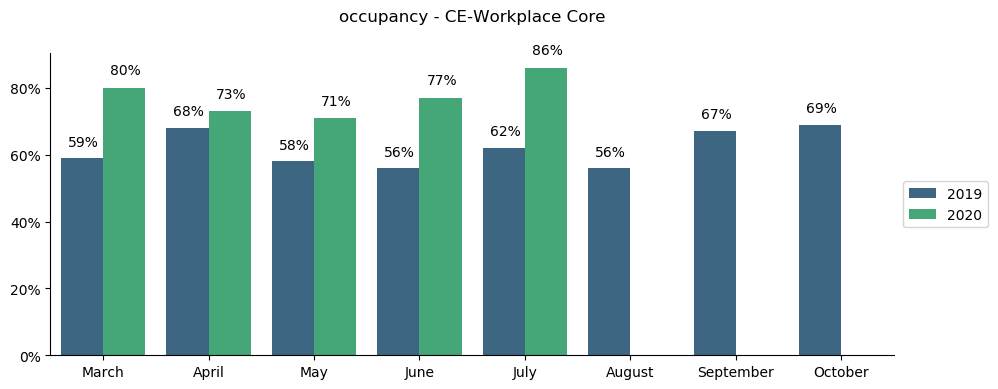

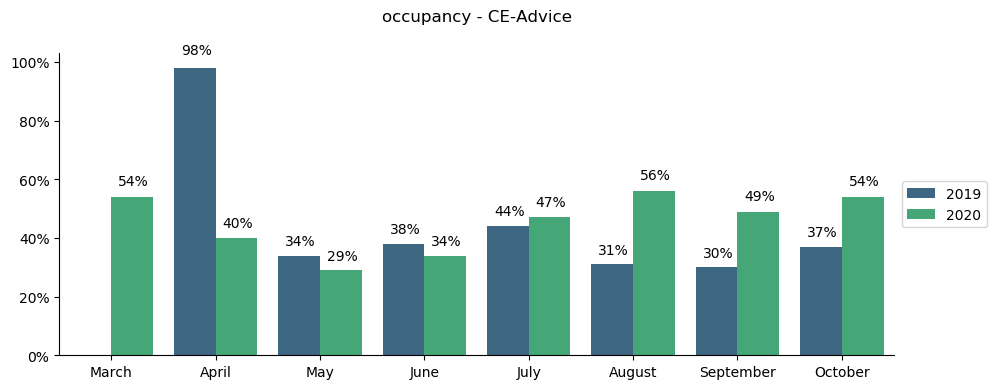

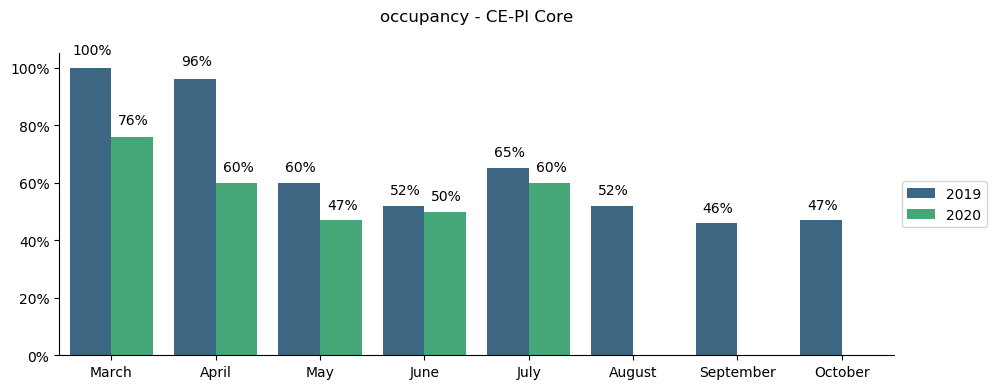

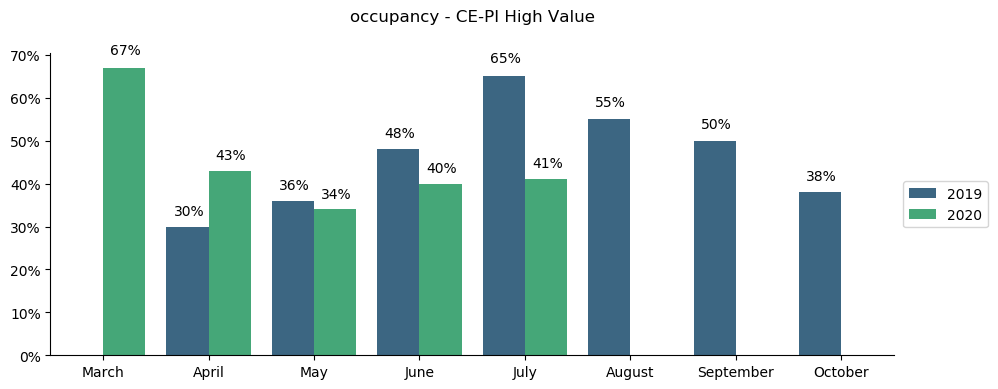

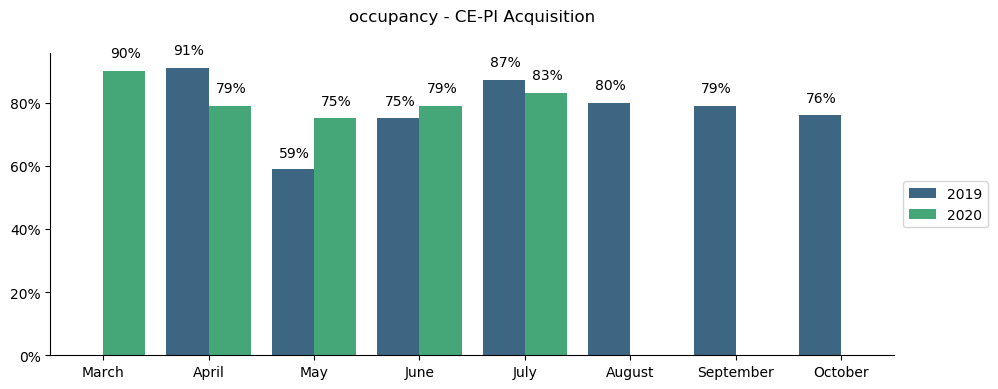

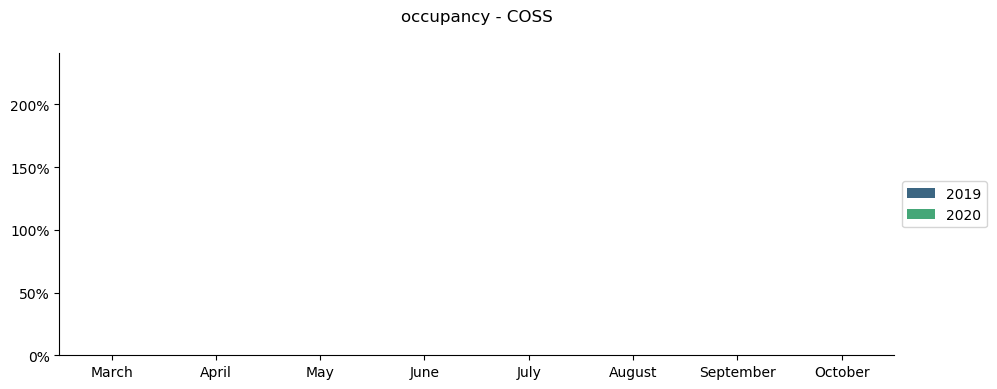

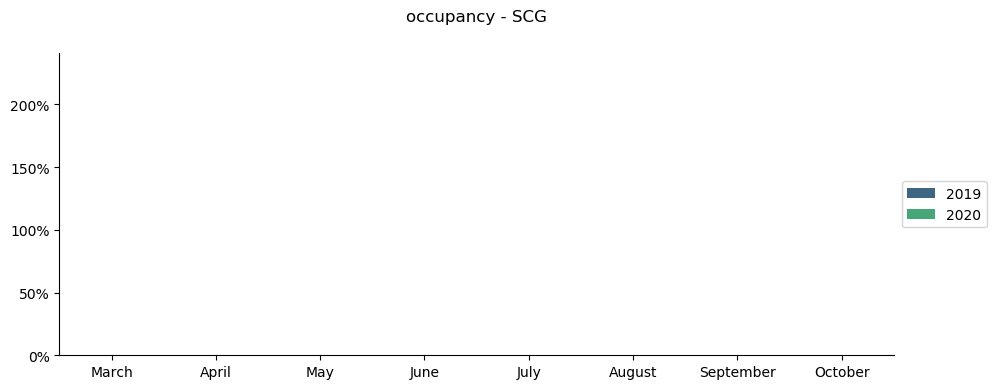

In [5]:
plot_bu(df, 'occupancy', group='div')
plot_bu(df, 'occupancy', group='bu')

# How has online time changed by business unit and division?

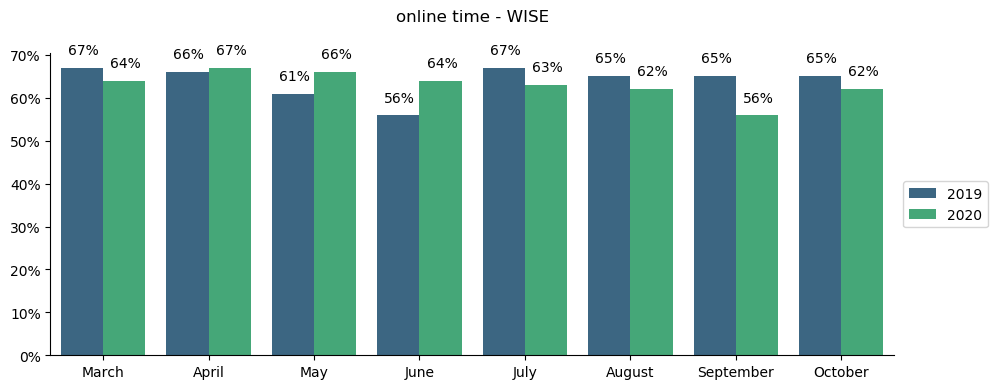

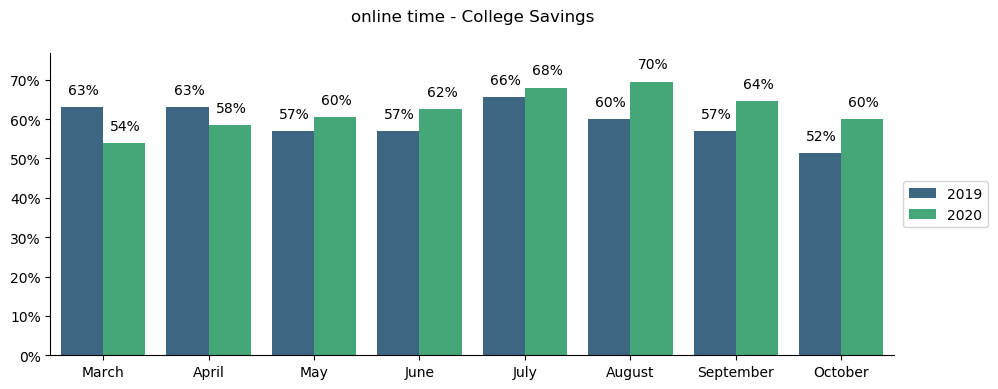

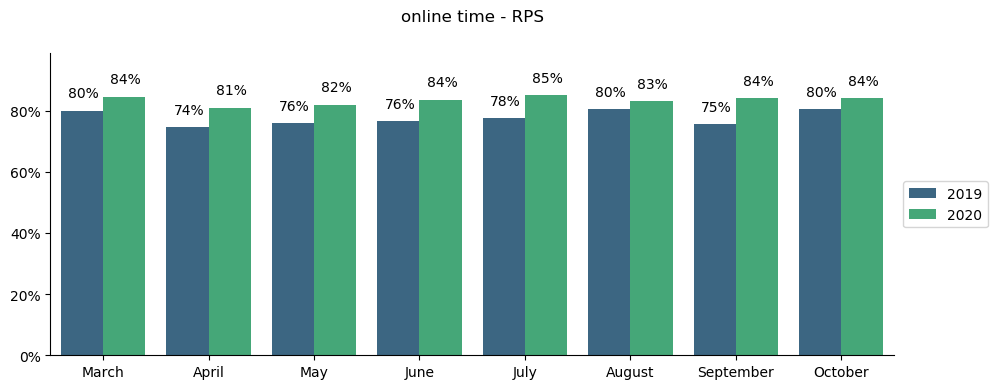

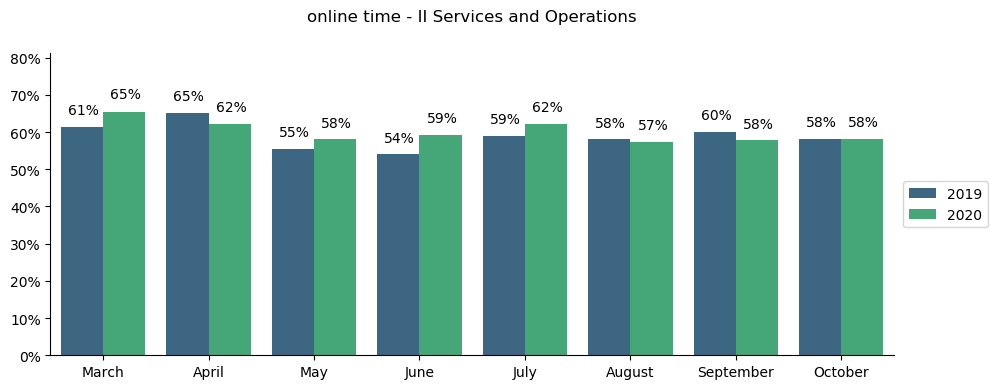

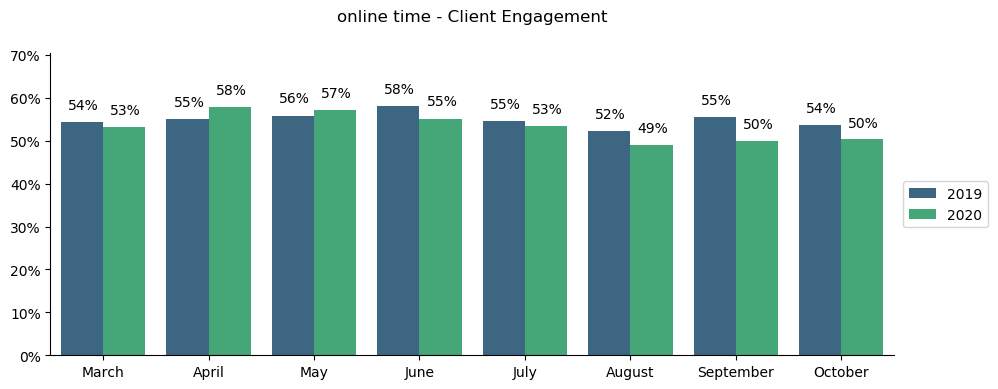

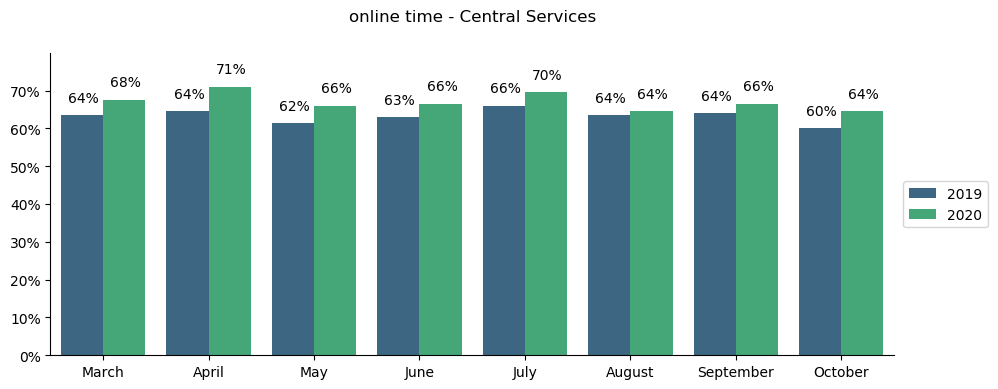

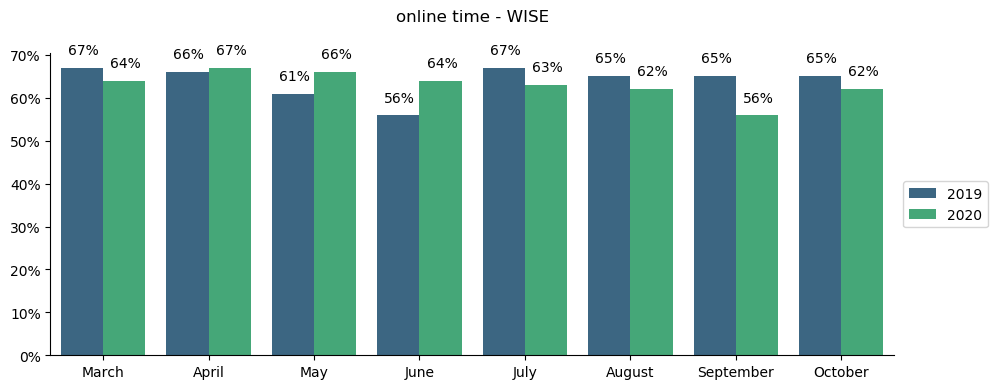

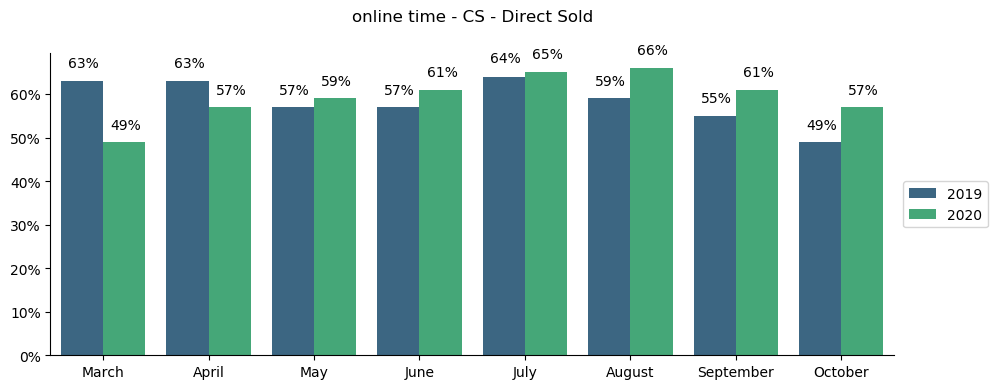

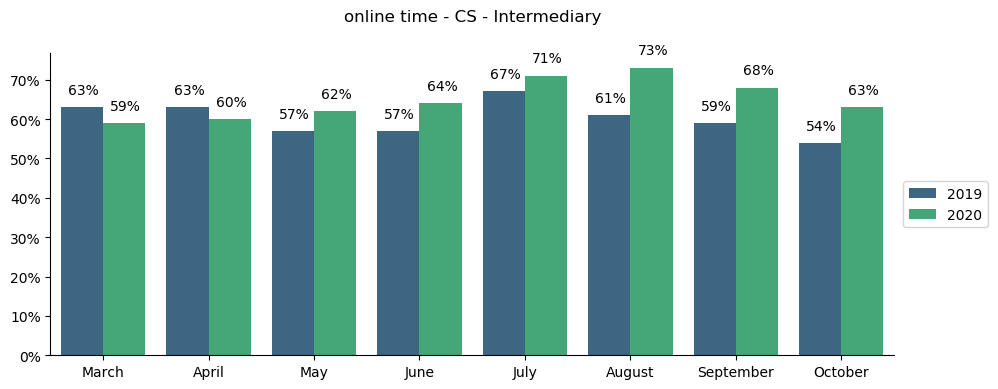

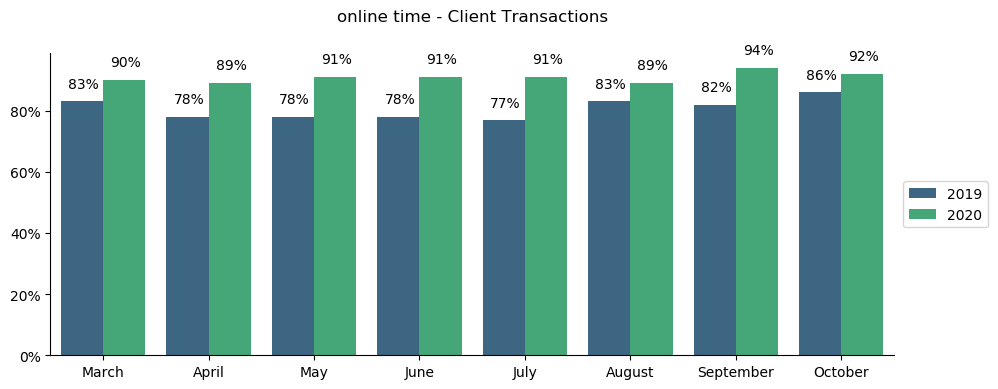

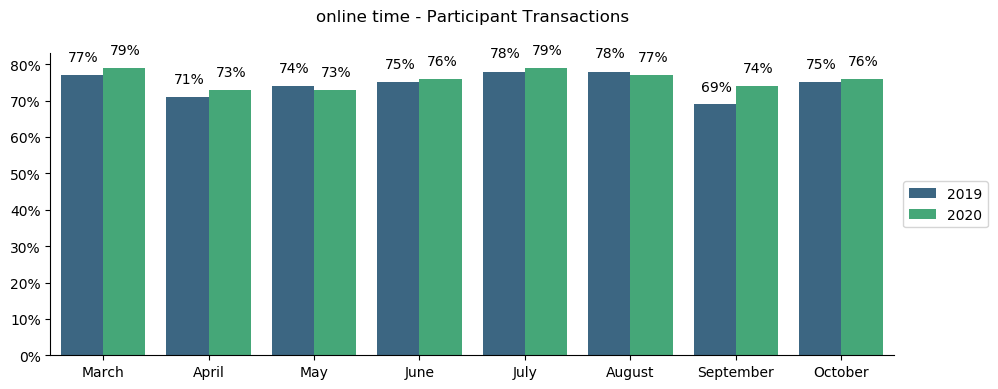

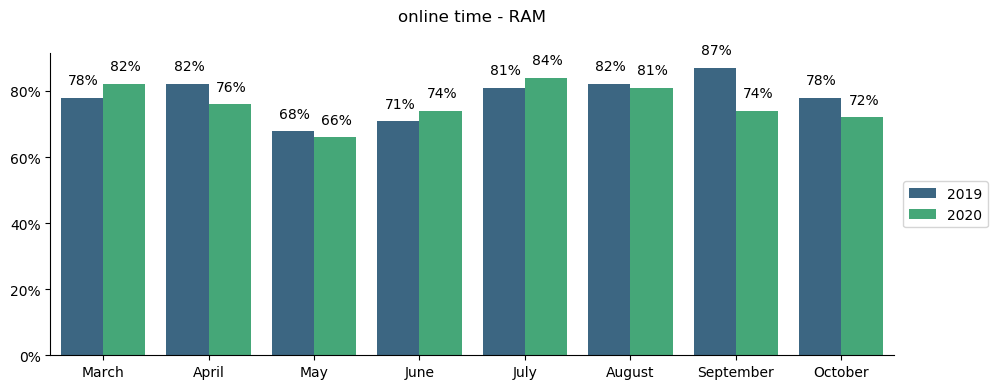

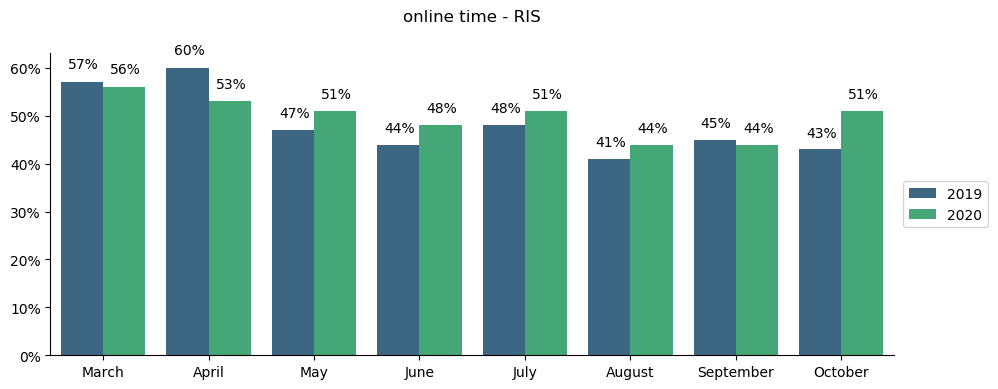

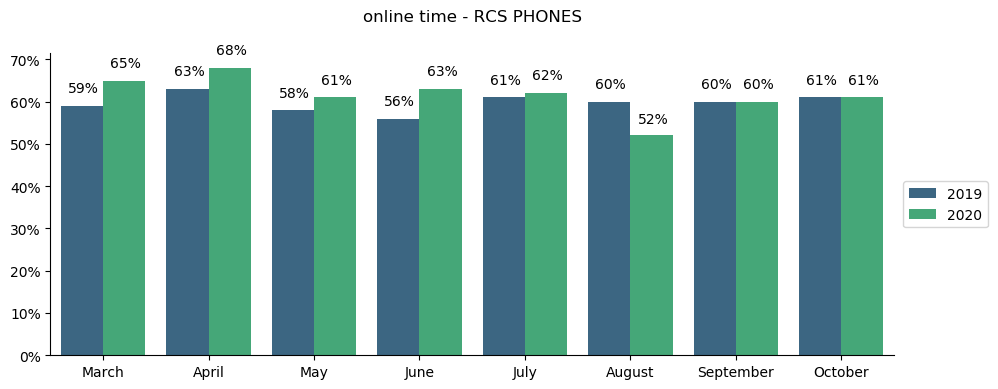

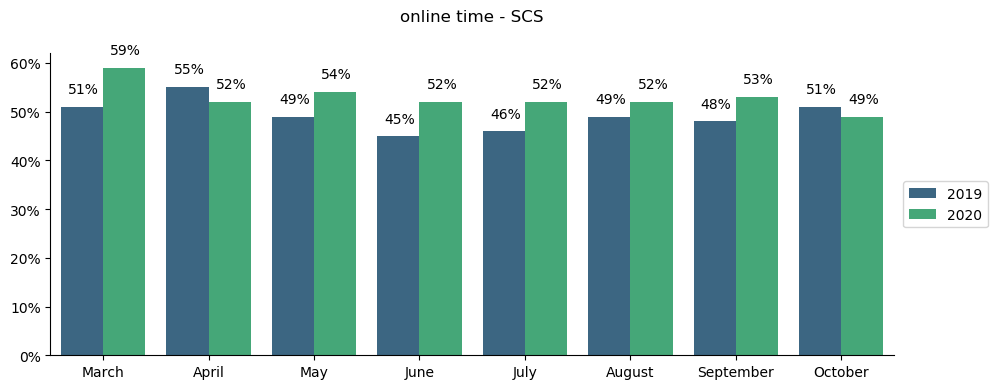

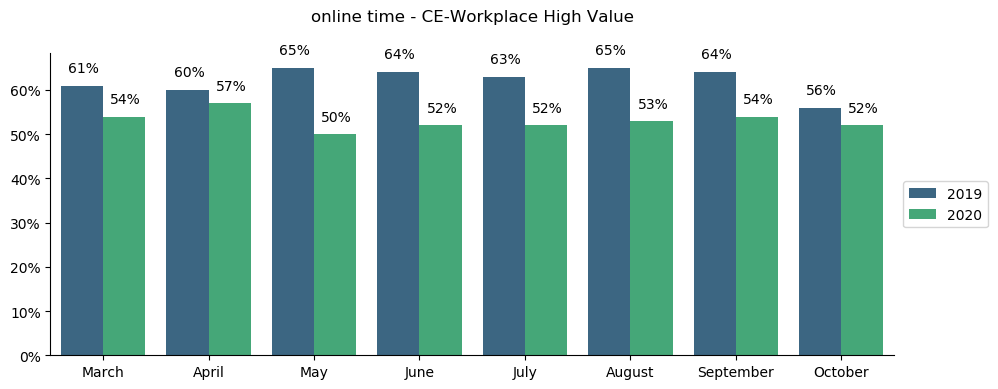

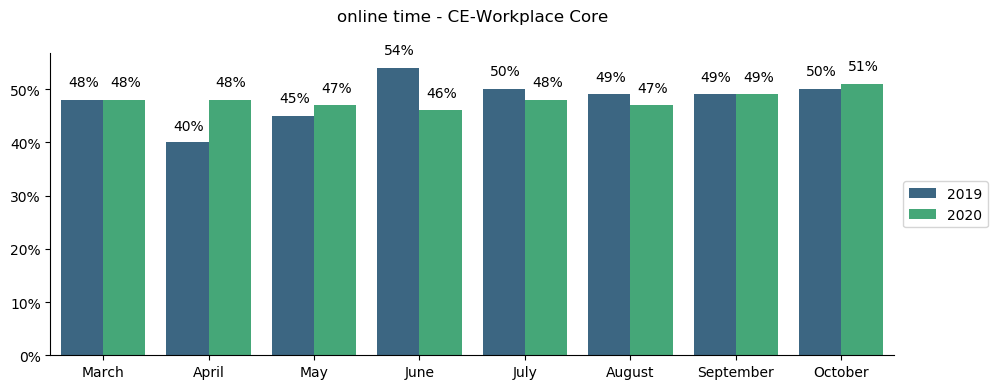

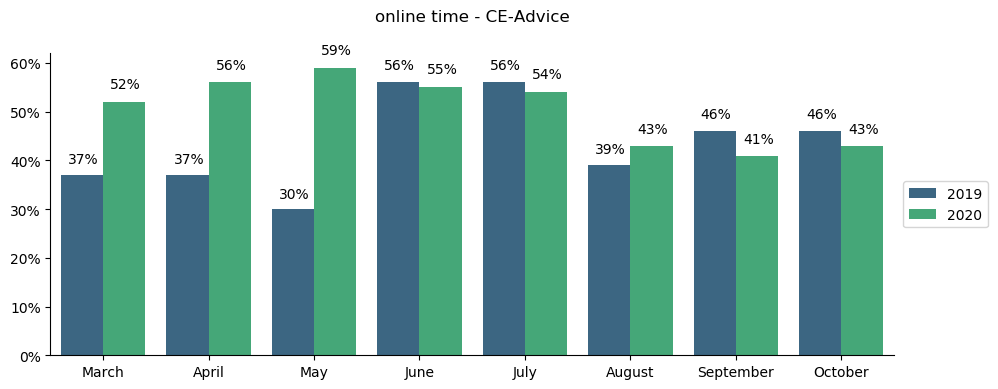

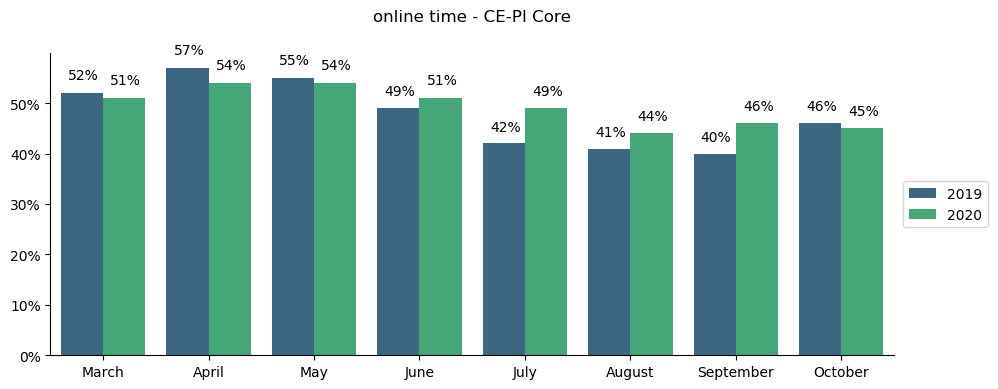

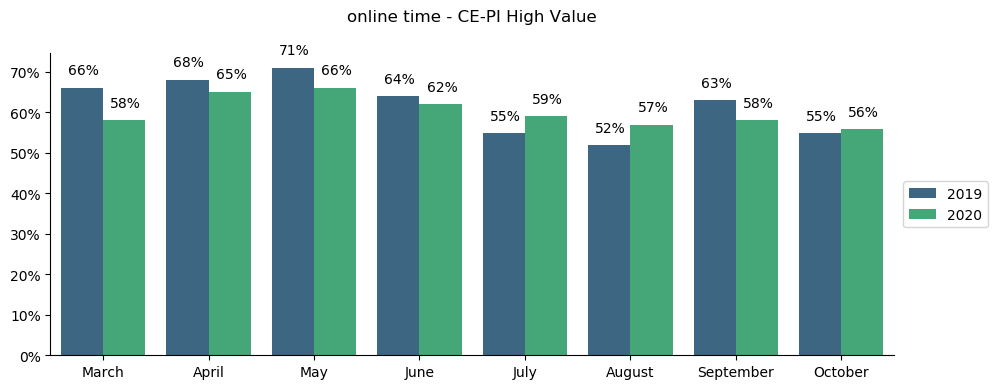

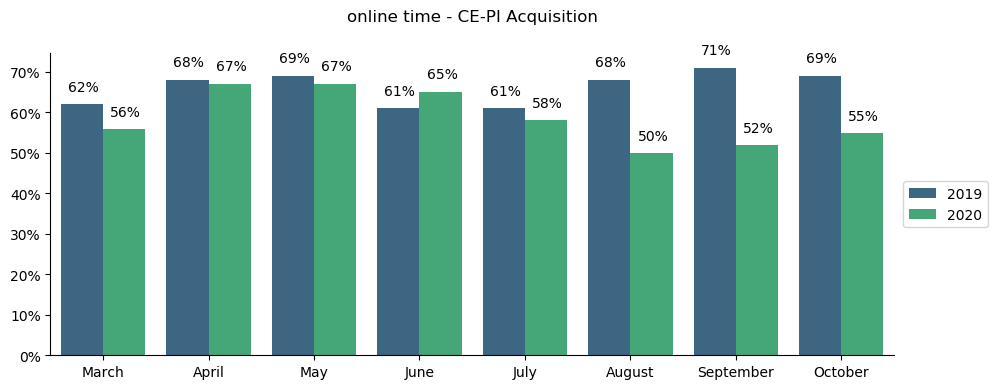

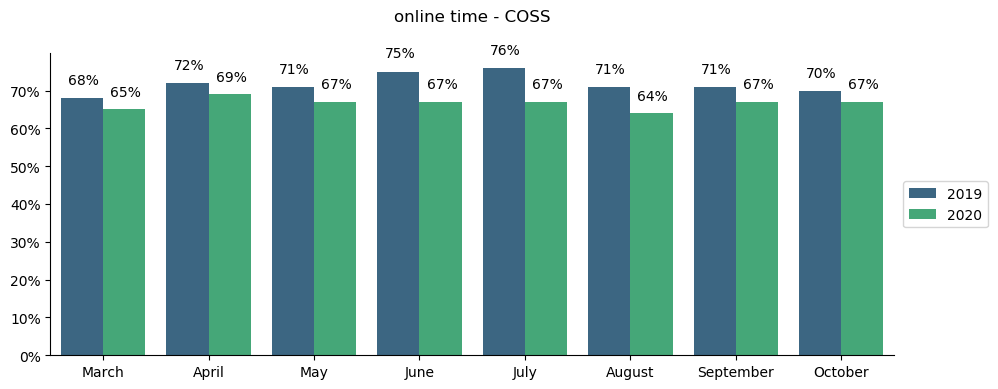

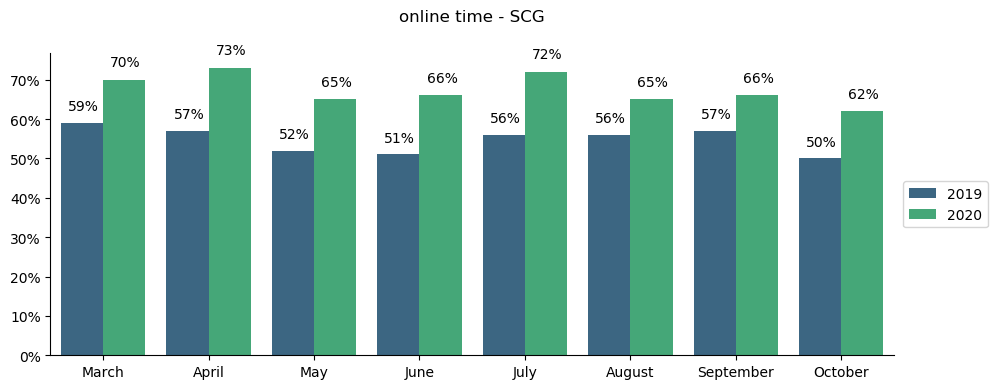

In [6]:
plot_bu(df, 'online time', group='div')
plot_bu(df, 'online time', group='bu')

# What is the sum of overtime by business unit and division?

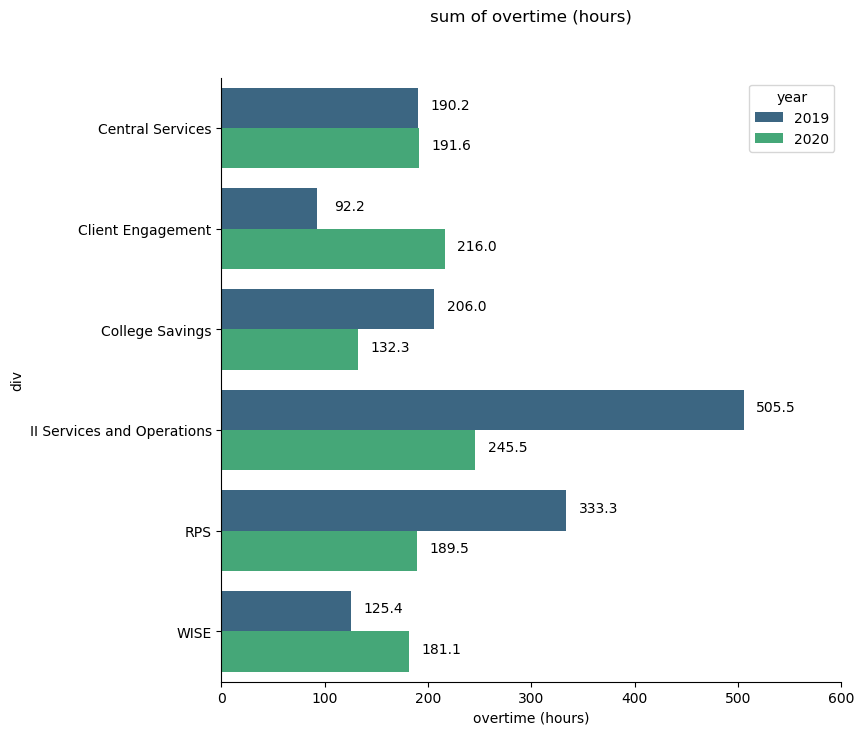

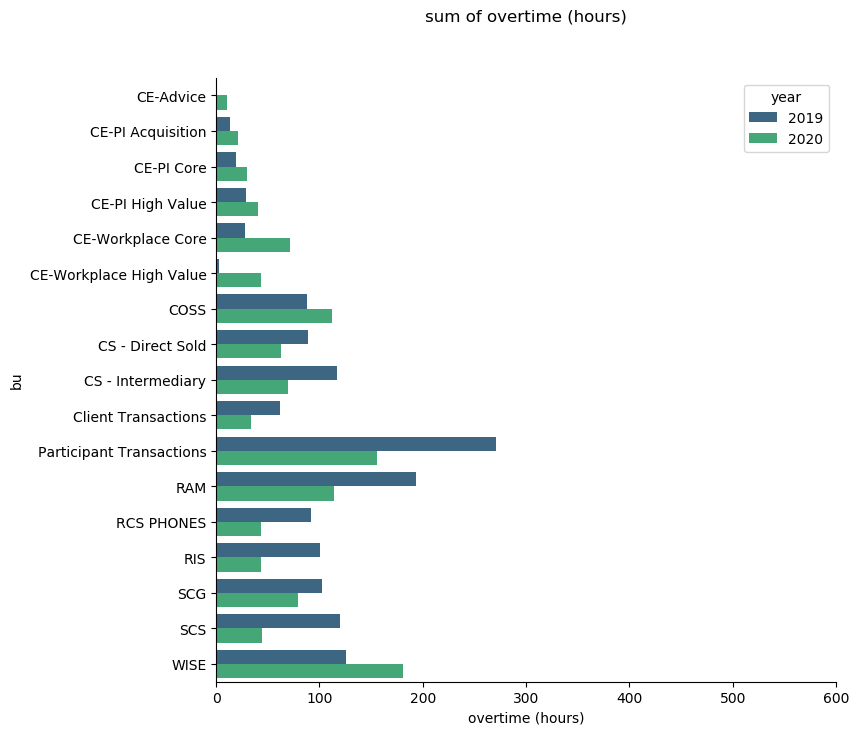

In [7]:
def plot_sum_overtime(bu, annotate=True):
    plt.figure(figsize=(8,8), dpi=100)
    plt.title('sum of overtime (hours)', y=1.08)
    g = df1.groupby([bu, 'year'])['overtime (hours)'].sum()
    g = g.reset_index(drop=False)
    ax = sns.barplot(data=g, palette='viridis', y=bu, x='overtime (hours)', hue='year', errwidth=0)
    if annotate:
        for p in ax.patches:
            height = p.get_height()
            width = p.get_width()
            x, y = p.get_xy()
            ax.annotate(f'{width:.1f}', ((x + width)+30, y + height/2), 
                                   ha = 'center', va = 'center', 
                                   xytext = (1, 2), 
                                   textcoords = 'offset points')


    ax.set_xlim(0, 600)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    plt.show()

plot_sum_overtime('div')
plot_sum_overtime('bu', annotate=False)

# What is the mean occupancy and online time by division and business unit?

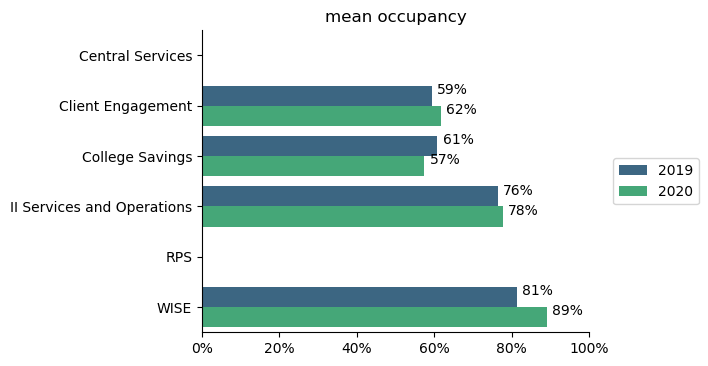

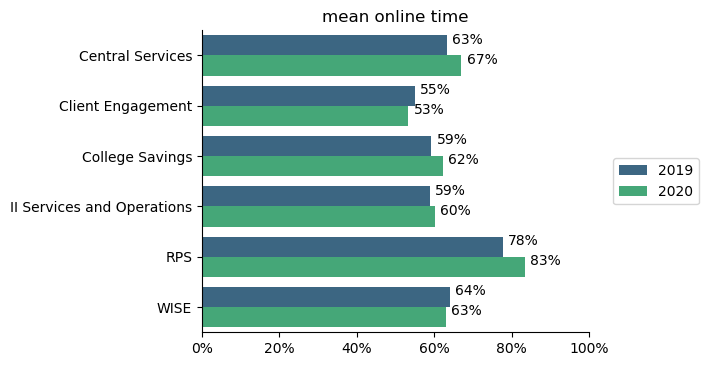

In [8]:
for kpi in ['occupancy', 'online time']:
    plt.figure(figsize=(5,4), dpi=100)
    plt.title('mean '+ kpi)
    g = (df1.groupby(['div', 
                                'year'])[kpi].mean())
    g = g.reset_index(drop=False)
    ax = sns.barplot(data=g, palette='viridis', y='div', x=kpi, hue='year', errwidth=0)
    for p in ax.patches:
        height = p.get_height()
        width = p.get_width()
        x, y = p.get_xy()
        ax.annotate(f'{width:.0%}', ((x + width)+.05, y + height/1.2), 
                               ha = 'center', va = 'center', 
                               xytext = (1, 9), 
                               textcoords = 'offset points')

    ax.set_xlim(0, 1)
    ax.legend(loc='right', bbox_to_anchor=(1.3,0.5))
    vals = ax.get_xticks()
    ax.set_xticklabels(['{:,.0%}'.format(x) for x in vals])
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    plt.xlabel('')
    plt.ylabel('')
    plt.show()

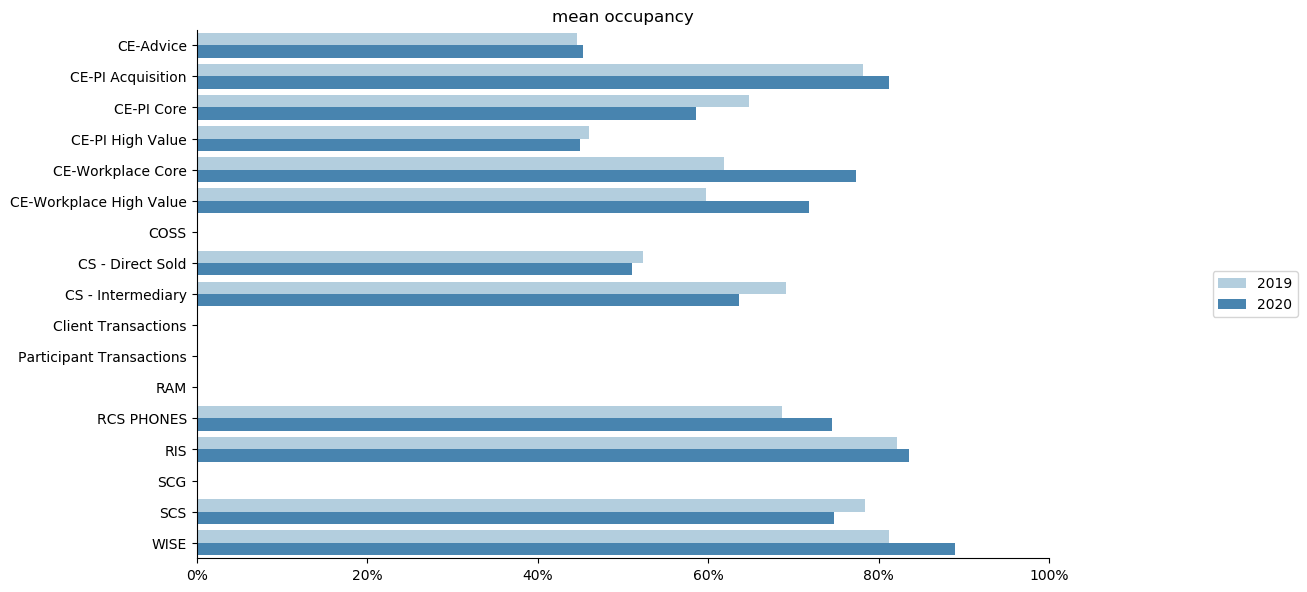

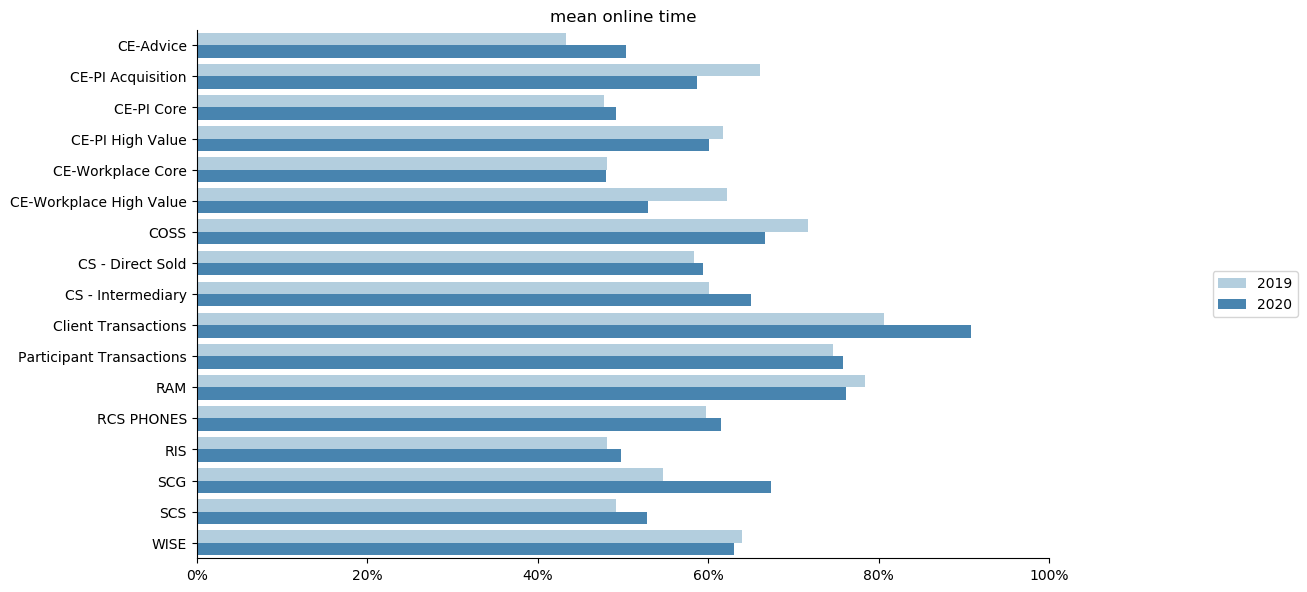

In [9]:
for kpi in ['occupancy', 'online time']:
    plt.figure(figsize=(11,7), dpi=100)
    plt.title('mean '+ kpi)
    g = (df1.groupby(['bu','year'])[kpi].mean())
    g = g.reset_index(drop=False)
    ax = sns.barplot(data=g, palette='Blues', y='bu', x=kpi, hue='year', errwidth=0)

    ax.set_xlim(0, 1)
    ax.legend(loc='right', bbox_to_anchor=(1.3,0.5))
    vals = ax.get_xticks()
    ax.set_xticklabels(['{:,.0%}'.format(x) for x in vals])
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    plt.xlabel('')
    plt.ylabel('')
    plt.show()

# How do ratios of overtime by division compare from 2019 to 2020?

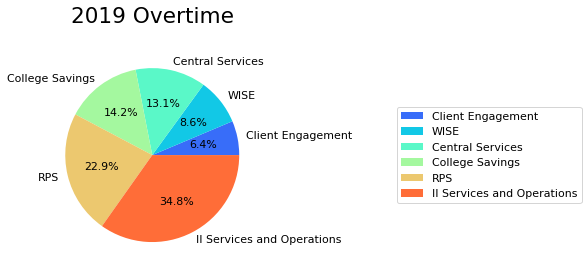

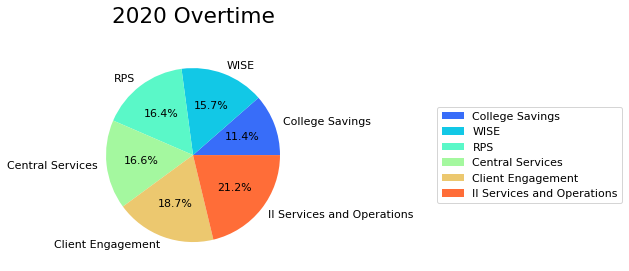

In [62]:
# plt.style.use('dark_background')
def plot_pie(bu, kpi, year):

    mpl.rcParams['font.size'] = 11
    colors = sns.color_palette('rainbow').as_hex()
    _ = df[[bu, kpi]][df['year']==year].groupby([bu]).sum().sort_values(by=kpi).plot(subplots=True, 
                    kind='pie', figsize=(4,4), colors=colors,
                      autopct='%0.1f%%',
                      shadow=False)
    mpl.rcParams['font.size'] = 18
    plt.title(str(year)+' Overtime', y=1.08)
    mpl.rcParams['font.size'] = 11
    plt.legend(loc='right', bbox_to_anchor=(2.5,0.5))
    plt.ylabel('')
    plt.show()

plot_pie('div', 'overtime (hours)', 2019)
plot_pie('div', 'overtime (hours)', 2020)

In [12]:
df.groupby(['div','year']).mean()

overtime (hours)  occupancy  online time
div                        year                                          
Central Services           2019         11.885417        NaN     0.632500
                           2020         11.973958        NaN     0.670000
Client Engagement          2019          1.921875   0.593636     0.548958
                           2020          4.500000   0.616061     0.532500
College Savings            2019         12.875000   0.607500     0.592500
                           2020          8.270833   0.573750     0.621875
II Services and Operations 2019         15.796875   0.763750     0.588750
                           2020          7.671875   0.776250     0.600625
RPS                        2019         20.829167        NaN     0.776250
                           2020         11.843750        NaN     0.833750
WISE                       2019         15.677083   0.812500     0.640000
                           2020         22.635417   0.890000     0.630000

# Conclusion

<b>Over time</b>
- Mean Overtime hours have seen dramatic decreases from 2019 to 2020 for College Savings, II Services and Operations, and RPS.

- Central services mean overtime hours have remained the same from 2019 to 2020.

- WISE and Client Engagement mean overtime hours have increased significantly.

<b>Occupancy</b>
- Mean Occupancy has remained the same for all business units except WISE. Central Services and RPS are not included.

<b>Online Time</b>
- Mean online time has increased by 3 or more percent from 2019 to 2020 for Central Services, College Savings, and RPS